# ISTA 322 SP25 Final Project - Jinwoo Choi - UFC Fighter Data

## This Project will consist in data cleaning a semi-structured data to structed data where our end users can analyze the basic information of the figther, information on their wins, and information on their losses.

### My hope is that anyone using the RDB will be able to answer some common questions, such as:

*   Does better size means more wins?
*   Do they have some sort of pattern in their finishes? Knockout or submission?
* Do they like to fight until the end of all rounds or finish as early as possible?
*   Do they have some sort of pattern on how they lose? Knockout or submission?
* what rounds do they lost the most? at the beginning, at the end, or by decision?

### these are some of the examples but much more interpretation are possible and welcomed.

---

## Here are some basic terms from MMA world for those who are not familiar with this sport to help you with the better understanding of this data.
* Knockout (KO, TKO(technical knockout)) -  fight result when a strike or combination of strikes renders a fighter unable to continue. "KO" for short. When the referee determines that a fighter is not unconscious but is unable to defend himself, the ref declares it a technical knockout (TKO).
* Submission - fight result when a fighter cannot escape a choke or joint lock and either taps out or verbally submits.

### for more MMA vocabs - https://www.espn.com/mma/story/_/id/37901020/a-glossary-terms-used-mixed-martial-arts-events-ufc-cage






# Data

## Sources
* https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics/data
* https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset
* https://www.kaggle.com/datasets/alexmagnus24/ufc-fight-statistics-july-2016-nov-2024


# Extract

In [ ]:
import pandas as pd
import numpy as np
import datetime
import math
pd.__version__

'2.2.2'

## Explore fighters_info_raw

In [ ]:
fighters_info_raw = pd.read_csv('https://ista322jinwoochoi.s3.us-east-2.amazonaws.com/ufc-fighters-statistics.csv')

In [ ]:
# check the data size
fighters_info_raw.shape

(4111, 18)

In [ ]:
# preview of the dataframe
fighters_info_raw.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [ ]:
#column names
fighters_info_raw.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [ ]:
# basic summary of the data frame to get some basic understanding
fighters_info_raw.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


Let's check for NaN values to see if there could be a problem.

In [ ]:
# check for NaN values
for col in fighters_info_raw.columns:
    print(col)
    print(fighters_info_raw[col].isna().sum())

name
0
nickname
1854
wins
0
losses
0
draws
0
height_cm
298
weight_in_kg
87
reach_in_cm
1927
stance
823
date_of_birth
1135
significant_strikes_landed_per_minute
0
significant_striking_accuracy
0
significant_strikes_absorbed_per_minute
0
significant_strike_defence
0
average_takedowns_landed_per_15_minutes
0
takedown_accuracy
0
takedown_defense
0
average_submissions_attempted_per_15_minutes
0


There are some columns containing NaN values, but none that should be problematic. Not everyone has nicknames in UFC and also some of the biography just simply does not exist in UFC database. But none of the basic stats columns have NaN which is good.

No columns to drop here, this database shows every overview you need to know about each fighters, so we will leave it as it is!

In [ ]:
# we will take out the name raw just to make sure we have looked throught the data
fighters_info = fighters_info_raw

## Explore fighters_odds_raw

In [ ]:
fighters_odds_raw = pd.read_csv('https://ista322jinwoochoi.s3.us-east-2.amazonaws.com/ufc-master.csv')

In [ ]:
# check the data size
fighters_odds_raw.shape

(6528, 118)

In [ ]:
# preview of the data frame
fighters_odds_raw.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Feathe

In [ ]:
# since they are is lots of columns, in order to display all the columns names we have to get rid of maximum amount of columns we can display
pd.set_option('display.max_columns', None)

In [ ]:
# datetime the dates just to make sure
fighters_odds_raw['Date'] = pd.to_datetime(fighters_odds_raw['Date'])

In [ ]:
fighters_odds_raw.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,5696.000000,5695.000000,5686.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6073.000000,6171.000000,6171.000000,6171.000000,6161.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5042.000000,1200.000000,1779.000000,96.000000,9.0,146.000000,154.000000,186.000000,184.000000,182.000000,191.000000,184.000000,177.000000,181.000000,188.000000,253.000000,73.000000,1.0,100.000000,107.000000,148.000000,120.000000,137.000000,119.000000,120.000000,124.000000,119.000000,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,2018-03-19 18:17:12.352941312,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,0.500202,1.320536,0.325419,1.923407,1.863664,11.872396,0.251685,0.017770,0.279871,1.093597,1.066330,0.626532,0.022212,3.145680,177.822068,182.162155,163.183977,0.622243,1.101562,0.031097,21.152766,0.460321,0.536907,1.399962,0.341467,2.679994,2.566789,17.408548,0.553462,0.026961,0.400888,1.612286,1.563879,0.934589,0.035539,4.628064,177.802399,182.410954,163.621324,30.359528,29.805607,0.059283,-0.143842,-0.756587,-1.482384,0.075061,-5.536152,-0.301777,-0.510876,-0.308058,-0.006679,-0.299271,0.096814,-2.663342,-0.071094,-0.171371,0.153114,8.339167,6.953345,7.291667,0.0,7.047945,7.097403,6.881720,7.119565,7.351648,7.130890,7.032609,6.983051,6.972376,6.590426,6.913043,8.410959,0.0,8.170000,8.476636,8.641892,8.483333,8.554745,8.386555,8.150000,7.967742,8.268908,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
min,-2100.000000,-1200.000000,4.761900,8.333300,2010-03-21 00:00:00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Explore fight_details_raw

In [ ]:
fight_details_raw = pd.read_csv('https://ista322jinwoochoi.s3.us-east-2.amazonaws.com/UFC+Fight+Statistics+(July+2016+-+Nov+2024).csv')

In [ ]:
# preview of the data frame
fight_details_raw.head()

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
0,Brandon Moreno,Amir Albazi,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Eric Colon 46 - 49. Sal D'amato 45 - 50. Derek...,Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",11/2/24,5,18,18,0,0,18,18,16,0,2,18,0,0,0,0,0,0,0,0.000000,1,16,23,0,0,16,23,12,1,3,16,0,0,0,0,0,0,0,0.000000,29.0,38.0,0.0,0.0,29.0,38.0,25.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.0,27.0,0.0,0.0,6.0,27.0,4.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.033333,31.0,37.0,0.0,0.0,31.0,37.0,23.0,5.0,3.0,28.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,12.0,31.0,0.0,0.0,12.0,31.0,9.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,48.0,0.0,0.0,2

In [ ]:
# datetime the dates just to make sure
fight_details_raw['Date'] = pd.to_datetime(fight_details_raw['Date'])

<ipython-input-73-d128705350d2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fight_details_raw['Date'] = pd.to_datetime(fight_details_raw['Date'])


In [ ]:
# check the data frame size
fight_details_raw.shape

(4167, 194)

194 is lots of columns to look at, we will see if we can drop few columns.

In [ ]:
for col in fight_details_raw.columns:
    print(col)

Fighter1
Fighter2
Winner?
Fight Method
Time
Time Format
Referee
Finish Details or Judges Scorecard
Bout
Event Name
Location
Date
Rounds
Total Strike Landed F1R1
Total Strike Missed F1R1
Non-Sig. Strike Landed F1R1
Non-Sig. Strike Missed F1R1
Sig. Strike Landed F1R1
Sig. Strike Missed F1R1
Head F1R1
Body F1R1
Leg F1R1
Distance F1R1
Clinch F1R1
Ground F1R1
Knockdowns F1R1
TD Completed F1R1
TD Missed F1R1
Sub. Att F1R1
Rev. F1R1
Ctrl Time (Minutes) F1R1
Winner?.1
Total Strike Landed F2R1
Total Strike Missed F2R1
Non-Sig. Strike Landed F2R1
Non-Sig. Strike Missed F2R1
Sig. Strike Landed F2R1
Sig. Strike Missed F2R1
Head F2R1
Body F2R1
Leg F2R1
Distance F2R1
Clinch F2R1
Ground F2R1
Knockdowns F2R1
TD Completed F2R1
TD Missed F2R1
Sub. Att F2R1
Rev. F2R1
Ctrl Time (Minutes) F2R1
Total Strike Landed F1R2
Total Strike Missed F1R2
Non-Sig. Strike Landed F1R2
Non-Sig. Strike Missed F1R2
Sig. Strike Landed F1R2
Sig. Strike Missed F1R2
Head F1R2
Body F1R2
Leg F1R2
Distance F1R2
Clinch F1R2
Ground 

Looks like most of the columns are showing the stats for every round of the fight. For this project, we are looking at the overview stats of the fight instead of diving into specific round, so we will add up all the the columns to have a total stats of the fight rather giant columns of stats every round.

In [ ]:
# basic summary of the data frame
fight_details_raw.describe()

,Winner?,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
count,4167.000000,4167,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,3174.000000,3174.000000,3173.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,

# Transform

Now we only have the datas we need, it's now time for clean up and standardize our data before we load it into our RDB

Our basic plan is to:
1. transform the tables we need to adjst
2. do some cleaning of those combined table
3. create fighter_id and then add it to the odds table and detail table



## transform fighters_odds
there are lots of information to this data, we will only need some part of it for followin reasons:
- rebundant to other dataframes
- all the detailed information that are relavent to the calculating the odds, our goal is to have a basic understanding of the fighters before looking at how the fight went, not much about what all the things were considered on why the odds were set that way.
- other unnecessary datas - I didn't think the EmptyArena would be necessary for this database because, this column was mostly used during covid times, and felt irrelevant for this specific project.

In [ ]:
# check the columns
for col in fighters_odds_raw.columns:
    print(col)

RedFighter
BlueFighter
RedOdds
BlueOdds
RedExpectedValue
BlueExpectedValue
Date
Location
Country
Winner
TitleBout
WeightClass
Gender
NumberOfRounds
BlueCurrentLoseStreak
BlueCurrentWinStreak
BlueDraws
BlueAvgSigStrLanded
BlueAvgSigStrPct
BlueAvgSubAtt
BlueAvgTDLanded
BlueAvgTDPct
BlueLongestWinStreak
BlueLosses
BlueTotalRoundsFought
BlueTotalTitleBouts
BlueWinsByDecisionMajority
BlueWinsByDecisionSplit
BlueWinsByDecisionUnanimous
BlueWinsByKO
BlueWinsBySubmission
BlueWinsByTKODoctorStoppage
BlueWins
BlueStance
BlueHeightCms
BlueReachCms
BlueWeightLbs
RedCurrentLoseStreak
RedCurrentWinStreak
RedDraws
RedAvgSigStrLanded
RedAvgSigStrPct
RedAvgSubAtt
RedAvgTDLanded
RedAvgTDPct
RedLongestWinStreak
RedLosses
RedTotalRoundsFought
RedTotalTitleBouts
RedWinsByDecisionMajority
RedWinsByDecisionSplit
RedWinsByDecisionUnanimous
RedWinsByKO
RedWinsBySubmission
RedWinsByTKODoctorStoppage
RedWins
RedStance
RedHeightCms
RedReachCms
RedWeightLbs
RedAge
BlueAge
LoseStreakDif
WinStreakDif
LongestWinStrea

Lots of columns, but some are rebundant with our other datas, so let's try to reduce them.

In [ ]:
# Save the raw data into a new table
fighters_odds_dropped = fighters_odds_raw.copy(deep=True)

In [ ]:
# odds expected value is rebundant to the odds, so we will just keep the odds
fighters_odds_dropped = fighters_odds_dropped.drop('RedExpectedValue', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueExpectedValue', axis='columns')

# Location, Country, NumberOfRounds is rebundant because we have it on the other table, so we will get rid of these ones
fighters_odds_dropped = fighters_odds_dropped.drop('Location', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('Country', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('NumberOfRounds', axis='columns')

# these columns already exists in the fighters_info table
fighters_odds_dropped = fighters_odds_dropped.drop('BlueDraws', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueAvgSigStrLanded', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueAvgSigStrPct', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueAvgSubAtt', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueAvgTDLanded', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueAvgTDPct', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueLosses', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueWins', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueStance', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueHeightCms', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueReachCms', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BlueWeightLbs', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedDraws', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedAvgSigStrLanded', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedAvgSigStrPct', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedAvgSubAtt', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedAvgTDLanded', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedAvgTDPct', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedLosses', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedWins', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedStance', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedHeightCms', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedReachCms', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RedWeightLbs', axis='columns')

# empty arena are most likely used for covid times, this won't matter much also related to the odds and what we are trying to accomplish.
fighters_odds_dropped = fighters_odds_dropped.drop('EmptyArena', axis='columns')

# all the finish details exist in fight_details, so we won't need it here.
fighters_odds_dropped = fighters_odds_dropped.drop('Finish', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('FinishDetails', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('FinishRound', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('FinishRoundTime', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('TotalFightTimeSecs', axis='columns')

# the ranks might be important when calculating odds, but for this project we only need to know what the odds are to see the overview of the odds, rather than the details of the odds. So we wont's be using them
fighters_odds_dropped = fighters_odds_dropped.drop('BMatchWCRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RMatchWCRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RWFlyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RWFeatherweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RWStrawweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RWBantamweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RHeavyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RLightHeavyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RMiddleweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RWelterweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RLightweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RFeatherweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RBantamweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RFlyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('RPFPRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BWFlyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BWFeatherweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BWStrawweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BWBantamweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BHeavyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BLightHeavyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BMiddleweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BWelterweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BLightweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BFeatherweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BBantamweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BFlyweightRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BPFPRank', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('BetterRank', axis='columns')

# same thing with differences between figthers, for this project we only need to know what the odds are to see the overview of the odds, rather than the details of the odds. So we wont's be using them
fighters_odds_dropped = fighters_odds_dropped.drop('LoseStreakDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('WinStreakDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('LongestWinStreakDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('WinDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('LossDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('TotalRoundDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('TotalTitleBoutDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('KODif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('SubDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('HeightDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('ReachDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('AgeDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('SigStrDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('AvgSubAttDif', axis='columns')
fighters_odds_dropped = fighters_odds_dropped.drop('AvgTDDif', axis='columns')



In [ ]:
# check the dropped table size
fighters_odds_dropped.shape

(6528, 39)

In [ ]:
# overview of the data after dropping columns
fighters_odds_dropped.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,2024-12-07,Red,True,Flyweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,6,6,42,3,0,2,4,2,4,0,34,31,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,2024-12-07,Red,False,Welterweight,MALE,0,8,8,20,0,0,1,4,3,0,0,0,6,6,11,0,0,0,0,1,5,0,30,27,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,2024-12-07,Red,False,Heavyweight,MALE,0,4,4,44,0,0,1,4,6,1,0,0,1,7,33,3,0,0,3,4,2,0,34,36,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,2024-12-07,Red,False,Featherweight,MALE,2,0,1,7,0,0,0,0,0,1,0,1,0,6,22,0,1,0,5,0,1,0,30,36,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,2024-12-07,Blue,False,Featherweight,MALE,0,1,3,15,0,0,0,0,4,0,0,0,1,3,17,0,1,0,1,1,2,0,36,33,275.0,550.0,500.0,700.0,300.0,250.0


Let's also check the na values to see if we find something odd

In [ ]:
# checking na values for each column
for col in fighters_odds_dropped.columns:
    print(col)
    print(fighters_odds_dropped[col].isna().sum())

RedFighter
0
BlueFighter
0
RedOdds
227
BlueOdds
226
Date
0
Winner
0
TitleBout
0
WeightClass
0
Gender
0
BlueCurrentLoseStreak
0
BlueCurrentWinStreak
0
BlueLongestWinStreak
0
BlueTotalRoundsFought
0
BlueTotalTitleBouts
0
BlueWinsByDecisionMajority
0
BlueWinsByDecisionSplit
0
BlueWinsByDecisionUnanimous
0
BlueWinsByKO
0
BlueWinsBySubmission
0
BlueWinsByTKODoctorStoppage
0
RedCurrentLoseStreak
0
RedCurrentWinStreak
0
RedLongestWinStreak
0
RedTotalRoundsFought
0
RedTotalTitleBouts
0
RedWinsByDecisionMajority
0
RedWinsByDecisionSplit
0
RedWinsByDecisionUnanimous
0
RedWinsByKO
0
RedWinsBySubmission
0
RedWinsByTKODoctorStoppage
0
RedAge
0
BlueAge
0
RedDecOdds
1087
BlueDecOdds
1116
RSubOdds
1336
BSubOdds
1359
RKOOdds
1334
BKOOdds
1360


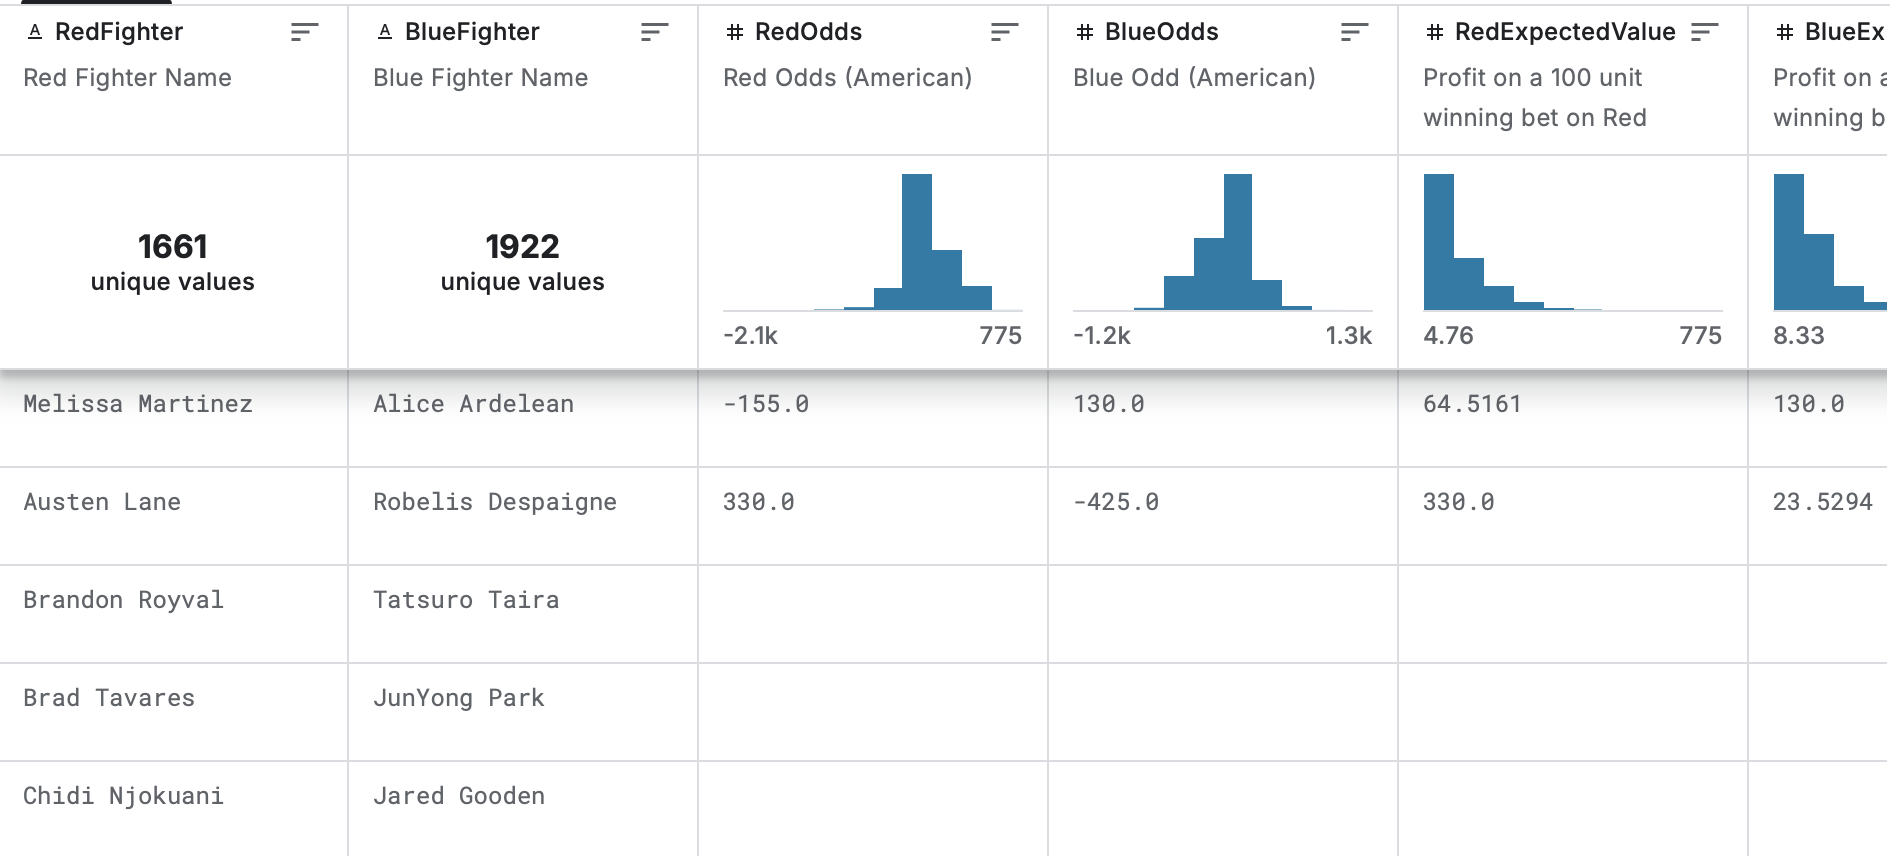

seems like odds have to have some missing values, but this is not a problem. Odds can vary little bit depending on the sources, and odds are there to just to give general idea of how fair the fight is. By checking at the resource that I extracted my data from, I didn't leak any data throught the process, the resources simply didn't contains those datas so we will leave it as it is.

In [ ]:
fighters_odds_dropped[fighters_odds_dropped['RedOdds'].isna()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
16,Song Kenan,Muslim Salikhov,NaN,-230.0,2024-11-23,Blue,False,Welterweight,MALE,0,1,5,26,0,0,2,2,3,0,0,0,1,2,23,0,0,0,3,3,0,0,34,40,NaN,175.0,NaN,1800.0,NaN,200.0
38,Veronica Hardy,Eduarda Moura,NaN,NaN,2024-11-16,Blue,False,Women's Flyweight,FEMALE,1,0,2,6,0,0,0,0,1,1,0,0,3,3,21,0,0,1,2,0,1,0,29,30,NaN,NaN,NaN,NaN,NaN,NaN
44,Karolina Kowalkiewicz,Denise Gomes,NaN,NaN,2024-11-09,Blue,False,Women's Strawweight,FEMALE,0,1,2,15,0,0,1,1,2,0,0,1,0,4,46,1,0,2,6,0,1,0,39,24,NaN,NaN,NaN,NaN,NaN,NaN
45,Elizeu Zaleski dos Santos,Zachary Scroggin,NaN,NaN,2024-11-09,Red,False,Welterweight,MALE,0,0,0,0,0,0,0,0,0,0,0,1,0,7,40,0,0,2,4,3,1,0,37,28,NaN,NaN,NaN,NaN,NaN,NaN
46,Matthew Semelsberger,Charles Radtke,NaN,NaN,2024-11-09,Blue,False,Welterweight,MALE,1,0,2,5,0,0,0,1,1,0,0,3,0,2,26,0,0,0,3,2,0,0,31,34,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,Alexis Davis,Julija Stoliarenko,NaN,NaN,2022-02-05,Red,False,Women's Bantamweight,FEMALE,3,0,0,9,0,0,0,0,0,0,0,1,0,3,43,1,0,2,5,1,1,0,37,28,NaN,NaN,NaN,NaN,NaN,NaN
1486,Jailton Almeida,Danilo Marques,NaN,NaN,2022-02-05,Red,False,Light Heavyweight,MALE,1,0,2,8,0,0,0,1,0,1,0,0,1,1,2,0,0,0,0,0,1,0,30,36,NaN,NaN,NaN,NaN,NaN,NaN
1487,Jason Witt,Phil Rowe,NaN,NaN,2022-02-05,Blue,False,Welterweight,MALE,0,1,1,8,0,0,0,0,2,0,0,0,1,1,7,0,1,0,0,0,1,0,35,31,NaN,NaN,NaN,NaN,NaN,NaN
1488,Malcolm Gordon,Denys Bondar,NaN,NaN,2022-02-05,Red,False,Flyweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,1,0,0,0,31,29,NaN,NaN,NaN,NaN,NaN,NaN


A lot better than before! The columns I decided to keep were some of the basic stats that are necessary for knowing about the fight. Quick history of this fighter to understand the odds, but not any complicated detailed information that is not necessary for taking up good amount of storage of the data.

## tranform fight_details_raw
Looks like most of the columns are showing the stats for every round of the fight. For this project, we are looking at the overview stats of the fight instead of diving into specific round, so we will add up all the the columns to have a total stats of the fight rather giant columns of stats every round.

But before we add the stats, let's check the na values.

In [ ]:
# checking na values for each column
for col in fight_details_raw.columns:
    print(col)
    print(fight_details_raw[col].isna().sum())

Fighter1
0
Fighter2
0
Winner?
0
Fight Method
0
Time
0
Time Format
0
Referee
10
Finish Details or Judges Scorecard
18
Bout
0
Event Name
0
Location
0
Date
0
Rounds
0
Total Strike Landed F1R1
0
Total Strike Missed F1R1
0
Non-Sig. Strike Landed F1R1
0
Non-Sig. Strike Missed F1R1
0
Sig. Strike Landed F1R1
0
Sig. Strike Missed F1R1
0
Head F1R1
0
Body F1R1
0
Leg F1R1
0
Distance F1R1
0
Clinch F1R1
0
Ground F1R1
0
Knockdowns F1R1
0
TD Completed F1R1
0
TD Missed F1R1
0
Sub. Att F1R1
0
Rev. F1R1
0
Ctrl Time (Minutes) F1R1
0
Winner?.1
0
Total Strike Landed F2R1
0
Total Strike Missed F2R1
0
Non-Sig. Strike Landed F2R1
0
Non-Sig. Strike Missed F2R1
0
Sig. Strike Landed F2R1
0
Sig. Strike Missed F2R1
0
Head F2R1
0
Body F2R1
0
Leg F2R1
0
Distance F2R1
0
Clinch F2R1
0
Ground F2R1
0
Knockdowns F2R1
0
TD Completed F2R1
0
TD Missed F2R1
0
Sub. Att F2R1
0
Rev. F2R1
0
Ctrl Time (Minutes) F2R1
0
Total Strike Landed F1R2
993
Total Strike Missed F1R2
993
Non-Sig. Strike Landed F1R2
994
Non-Sig. Strike Missed F

In [ ]:
# looking at the columns that has NaN values
fight_details_raw.columns[fight_details_raw.isnull().any()].tolist()

['Referee',
 'Finish Details or Judges Scorecard',
 'Total Strike Landed F1R2',
 'Total Strike Missed F1R2',
 'Non-Sig. Strike Landed F1R2',
 'Non-Sig. Strike Missed F1R2',
 'Sig. Strike Landed F1R2',
 'Sig. Strike Missed F1R2',
 'Head F1R2',
 'Body F1R2',
 'Leg F1R2',
 'Distance F1R2',
 'Clinch F1R2',
 'Ground F1R2',
 'Knockdowns F1R2',
 'TD Completed F1R2',
 'TD Missed F1R2',
 'Sub. Att F1R2',
 'Rev. F1R2',
 'Ctrl Time (Minutes) F1R2',
 'Total Strike Landed F2R2',
 'Total Strike Missed F2R2',
 'Non-Sig. Strike Landed F2R2',
 'Non-Sig. Strike Missed F2R2',
 'Sig. Strike Landed F2R2',
 'Sig. Strike Missed F2R2',
 'Head F2R2',
 'Body F2R2',
 'Leg F2R2',
 'Distance F2R2',
 'Clinch F2R2',
 'Ground F2R2',
 'Knockdowns F2R2',
 'TD Completed F2R2',
 'TD Missed F2R2',
 'Sub. Att F2R2',
 'Rev. F2R2',
 'Ctrl Time (Minutes) F2R2',
 'Total Strike Landed F1R3',
 'Total Strike Missed F1R3',
 'Non-Sig. Strike Landed F1R3',
 'Non-Sig. Strike Missed F1R3',
 'Sig. Strike Landed F1R3',
 'Sig. Strike Mis

Lets take a look on why are some finish details hold NaN values?

In [ ]:
fight_details_raw[fight_details_raw['Finish Details or Judges Scorecard'].isna()]

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
61,Renato Moicano,Benoit Saint Denis,1,TKO - Doctor's Stoppage,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,NaN,Lightweight Bout,UFC Fight Night: Moicano vs. Saint Denis,"Paris, Ile-de-France, France",2024-09-28,2,57,9,22,4,35,5,34,0,1,2,0,33,0,1,0,0,0,4.616667,1,12,1,8,0,4,1,0,3,1,4,0,0,0,0,0,0,0,0.000000,15.0,17.0,0.0,0.0,15.0,17.0,12.0,0.0,3.0,15.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.266667,23.0,34.0,2.0,0.0,21.0,34.0,13.0,7.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Notice the pattern on the fight method? most of them were doctor's stoppage which means the fight didn't have a finish nor did it have a scorecard details(there is no score card because the fight never ended and the judges didn't see enough fights to score the fight). But the decisions which also doesn't have a finish but it seems like the scorecard went onto the 'bout' column, we will have to manually fix that part. And lastly, DQ(disqualification) which makes sense why there wouldn't be a finish or decision.

Fixing Alexandr Romanov improper data.

In [ ]:
# putting proper value in the bout column, I googled the fight to see which weight class this fight was.
fight_details_raw.loc[fight_details_raw['Bout'].str.contains('Dave Hagen 28 - 29. Chris Lee 29 - 28. Tony We'), 'Bout'] = 'Heavyweight Bout'

In [ ]:
# put the fight detail in correct column
fight_details_raw.iloc[1850, 7] = 'Dave Hagen 28 - 29. Chris Lee 29 - 28. Tony Weeks 28 - 29.'

In [ ]:
# checking to fight again to see if everything looks right
fight_details_raw.loc[fight_details_raw['Fighter1']=='Alexandr Romanov']

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
9,Alexandr Romanov,Rodrigo Nascimento,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),Marc Goddard,Jason Tatlow 27 - 30. Thomas Collins 27 - 30. ...,Heavyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,32,4,30,1,2,3,2,0,0,0,0,2,0,4,1,1,0,4.783333,1,4,0,3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0.000000,26.0,45.0,NaN,0.0,17.0,11.0,14.0,2.0,1.0,15.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.766667,24.0,24.0,14.0,0.0,10.0,24.0,7.0,3.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,29.0,33.0,3.0,0.0,26.0,33.0,21.0,1.0,4.0,24.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,20.0,36.0,0.0,0.0,20.0,36.0,12.0,3.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN

Fixing the incorrect data in DeAnna Bennett's fight

In [ ]:
# putting proper value in the bout column, I googled the fight to see which weight class this fight was.
fight_details_raw.iloc[3491, 8] = 'Women Flyweight Bout'

In [ ]:
# put the fight detail in correct column
fight_details_raw.iloc[3491, 7] = 'Tony Weeks 27 - 29. Glenn Trowbridge 28 - 28. Jeff Mullen 28 - 28.'

After googling this fight, this fight was actually draw but I will not be change the winners column of this fight to NaN since I will be dropping this column eventually anyway.

In [ ]:
# checking to fight again to see if everything looks right
fight_details_raw.loc[fight_details_raw['Fighter1']=='DeAnna Bennett']

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
3491,DeAnna Bennett,Melinda Fabian,1,Decision - Majority,5:00,3 Rnd (5-5-5),John McCarthy,Tony Weeks 27 - 29. Glenn Trowbridge 28 - 28. ...,Women Flyweight Bout,The Ultimate Fighter: A New World Champion Finale,"Las Vegas, Nevada, USA",2017-12-01,3,30,12,10,0,20,12,10,8,2,9,11,0,0,0,2,1,0,3.35,1,29,21,9,0,20,21,14,5,1,14,6,0,1,0,0,0,0,0.4,13.0,2.0,6.0,0.0,7.0,2.0,4.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,4.35,48.0,18.0,38.0,5.0,10.0,13.0,7.0,3.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,21.0,19.0,1.0,20.0,20.0,11.0,5.0,4.0,13.0,6.0,1.0,0.0,0.0,2.0,0.0,0.0,2.133333,25.0,34.0,6.0,0.0,19.0,34.0,13.0,4.0,2.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,N

Now let's check on the NaN values in referee column

In [ ]:
fight_details_raw[fight_details_raw['Referee'].isna()]

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
38,Brad Tavares,JunYong Park,0,Decision - Split,5:00,3 Rnd (5-5-5),NaN,Junichiro Kamijo 29 - 28. Mike Bell 28 - 29. E...,Middleweight Bout,UFC Fight Night: Royval vs. Taira,"Las Vegas, Nevada, USA",2024-10-12,3,27,33,1,2,26,31,21,0,5,23,0,3,0,0,0,0,0,0.700000,0,21,27,2,0,19,27,12,2,5,19,0,0,0,0,2,0,0,1.300000,31.0,49.0,0.0,0.0,31.0,49.0,27.0,2.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.0,41.0,1.0,0.0,67.0,41.0,52.0,1.0,14.0,64.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.583333,15.0,4.0,7.0,0.0,8.0,4.0,7.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,35.0,18.0,22.0,8.0,13.0,10.0,12.0,1.0,0.0,8.0,0.0,5.0,0.0,1.0,2.0,0.0,0.0,4.650000,NaN,NaN,NaN,NaN,NaN,NaN,

It seems like the referee's value is just missing, we will leave it as it is since referee isn't a big deal in the fight stats, and other columns seems to be working fine.


Now let's take a look at why so many round stats are causing NaN values, round 1 seems to not have a NaN value which is good.

In [ ]:
# look at this fight or example
fight_details_raw[fight_details_raw['Fighter1']== 'Caio Machado']

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
2,Caio Machado,Brendson Ribeiro,0,Decision - Split,5:00,3 Rnd (5-5-5),Jerin Valel,Sal D'amato 28 - 29. Thomas Collins 29 - 28. M...,Light Heavyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,22,21,0,0,22,21,3,7,12,22,0,0,0,0,0,0,0,0.0,0,16,18,0,0,16,18,6,5,5,16,0,0,0,0,0,0,0,0.0,22.0,36.0,0.0,0.0,22.0,36.0,6.0,11.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,24.0,0.0,0.0,12.0,24.0,5.0,4.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,51.0,3.0,0.0,32.0,51.0,15.0,15.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,21.0,40.0,0.0,0.0,21.0,40.0,14.0,7.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

The round stats starts going NaN once 4th round starts. This is because this fight was a 3 round fight instead of 5 round fight.

UFC fight consists in 2 types of fight, regular fights are usually 3 round fights but if the fight is for the championship belt or some regular fight that is co-main events will have 5 round if the fight is a high profile (mostly decided by the organization to see if some non-championship fight deserves a 5 round, the organization does not have a consistent way to determine a high profile fight, mostly if the organization believe if it's going to be a close fight with high-profile fighters)

another way the round stats could cause NaN values? Finishes!

In [ ]:
# example of a fight with a finish
fight_details_raw[fight_details_raw['Fighter1']== 'Marc-Andre Barriault']

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5
4,Marc-Andre Barriault,Dustin Stoltzfus,0,KO/TKO,4:28,3 Rnd (5-5-5),Marc Goddard,Punch to Head In Clinch,Middleweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,1,13,4,6,0,7,4,6,1,0,0,7,0,0,0,0,0,0,0.016667,0,23,9,10,2,13,7,11,1,1,2,7,4,1,0,0,1,0,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Looking at Marc-Andre Barriault vs Dustin Stoltzfus, Marc got knocked out in 1st round by a "Punch to Head In Clinch" (If Winner? column has 0 value, it means that the Fighter2 won, and if it's 1 then the other way) which caused all the round stats to have NaN values after round 1.

So what will I do for the NaN values before adding up the round stats? I will be simply put 0 value for the NaN, because it makes sense since we are only looking for the sum of those round stats and NaN values will just give us trouble if we didn't handle it before adding them up.

In [ ]:
# replace NaN values with 0 for the round stats
cols_to_fill = ['Total Strike Landed F1R2',
 'Total Strike Missed F1R2',
 'Non-Sig. Strike Landed F1R2',
 'Non-Sig. Strike Missed F1R2',
 'Sig. Strike Landed F1R2',
 'Sig. Strike Missed F1R2',
 'Head F1R2',
 'Body F1R2',
 'Leg F1R2',
 'Distance F1R2',
 'Clinch F1R2',
 'Ground F1R2',
 'Knockdowns F1R2',
 'TD Completed F1R2',
 'TD Missed F1R2',
 'Sub. Att F1R2',
 'Rev. F1R2',
 'Ctrl Time (Minutes) F1R2',
 'Total Strike Landed F2R2',
 'Total Strike Missed F2R2',
 'Non-Sig. Strike Landed F2R2',
 'Non-Sig. Strike Missed F2R2',
 'Sig. Strike Landed F2R2',
 'Sig. Strike Missed F2R2',
 'Head F2R2',
 'Body F2R2',
 'Leg F2R2',
 'Distance F2R2',
 'Clinch F2R2',
 'Ground F2R2',
 'Knockdowns F2R2',
 'TD Completed F2R2',
 'TD Missed F2R2',
 'Sub. Att F2R2',
 'Rev. F2R2',
 'Ctrl Time (Minutes) F2R2',
 'Total Strike Landed F1R3',
 'Total Strike Missed F1R3',
 'Non-Sig. Strike Landed F1R3',
 'Non-Sig. Strike Missed F1R3',
 'Sig. Strike Landed F1R3',
 'Sig. Strike Missed F1R3',
 'Head F1R3',
 'Body F1R3',
 'Leg F1R3',
 'Distance F1R3',
 'Clinch F1R3',
 'Ground F1R3',
 'Knockdowns F1R3',
 'TD Completed F1R3',
 'TD Missed F1R3',
 'Sub. Att F1R3',
 'Rev. F1R3',
 'Ctrl Time (Minutes) F1R3',
 'Total Strike Landed F2R3',
 'Total Strike Missed F2R3',
 'Non-Sig. Strike Landed F2R3',
 'Non-Sig. Strike Missed F2R3',
 'Sig. Strike Landed F2R3',
 'Sig. Strike Missed F2R3',
 'Head F2R3',
 'Body F2R3',
 'Leg F2R3',
 'Distance F2R3',
 'Clinch F2R3',
 'Ground F2R3',
 'Knockdowns F2R3',
 'TD Completed F2R3',
 'TD Missed F2R3',
 'Sub. Att F2R3',
 'Rev. F2R3',
 'Ctrl Time (Minutes) F2R3',
 'Total Strike Landed F1R4',
 'Total Strike Missed F1R4',
 'Non-Sig. Strike Landed F1R4',
 'Non-Sig. Strike Missed F1R4',
 'Sig. Strike Landed F1R4',
 'Sig. Strike Missed F1R4',
 'Head F1R4',
 'Body F1R4',
 'Leg F1R4',
 'Distance F1R4',
 'Clinch F1R4',
 'Ground F1R4',
 'Knockdowns F1R4',
 'TD Completed F1R4',
 'TD Missed F1R4',
 'Sub. Att F1R4',
 'Rev. F1R4',
 'Ctrl Time (Minutes) F1R4',
 'Total Strike Landed F2R4',
 'Total Strike Missed F2R4',
 'Non-Sig. Strike Landed F2R4',
 'Non-Sig. Strike Missed F2R4',
 'Sig. Strike Landed F2R4',
 'Sig. Strike Missed F2R4',
 'Head F2R4',
 'Body F2R4',
 'Leg F2R4',
 'Distance F2R4',
 'Clinch F2R4',
 'Ground F2R4',
 'Knockdowns F2R4',
 'TD Completed F2R4',
 'TD Missed F2R4',
 'Sub. Att F2R4',
 'Rev. F2R4',
 'Ctrl Time (Minutes) F2R4',
 'Total Strike Landed F1R5',
 'Total Strike Missed F1R5',
 'Non-Sig. Strike Landed F1R5',
 'Non-Sig. Strike Missed F1R5',
 'Sig. Strike Landed F1R5',
 'Sig. Strike Missed F1R5',
 'Head F1R5',
 'Body F1R5',
 'Leg F1R5',
 'Distance F1R5',
 'Clinch F1R5',
 'Ground F1R5',
 'Knockdowns F1R5',
 'TD Completed F1R5',
 'TD Missed F1R5',
 'Sub. Att F1R5',
 'Rev. F1R5',
 'Ctrl Time (Minutes) F1R5',
 'Total Strike Landed F2R5',
 'Total Strike Missed F2R5',
 'Non-Sig. Strike Landed F2R5',
 'Non-Sig. Strike Missed F2R5',
 'Sig. Strike Landed F2R5',
 'Sig. Strike Missed F2R5',
 'Head F2R5',
 'Body F2R5',
 'Leg F2R5',
 'Distance F2R5',
 'Clinch F2R5',
 'Ground F2R5',
 'Knockdowns F2R5',
 'TD Completed F2R5',
 'TD Missed F2R5',
 'Sub. Att F2R5',
 'Rev. F2R5',
 'Ctrl Time (Minutes) F2R5']

fight_details_raw[cols_to_fill] = fight_details_raw[cols_to_fill].fillna(0)


In [ ]:
# add up all the total strikes every round
fight_details_raw['Total_Strike_Landed_F1'] = fight_details_raw['Total Strike Landed F1R1'] + fight_details_raw['Total Strike Landed F1R2'] + fight_details_raw['Total Strike Landed F1R3'] + fight_details_raw['Total Strike Landed F1R4'] + fight_details_raw['Total Strike Landed F1R5']
fight_details_raw['Total_Strike_Landed_F2'] = fight_details_raw['Total Strike Landed F2R1'] + fight_details_raw['Total Strike Landed F2R2'] + fight_details_raw['Total Strike Landed F2R3'] + fight_details_raw['Total Strike Landed F2R4'] + fight_details_raw['Total Strike Landed F2R5']

# add up all the total Total Strike Missed every round
fight_details_raw['Total_Strike_Missed_F1'] = fight_details_raw['Total Strike Missed F1R1'] + fight_details_raw['Total Strike Missed F1R2'] + fight_details_raw['Total Strike Missed F1R3'] + fight_details_raw['Total Strike Missed F1R4'] + fight_details_raw['Total Strike Missed F1R5']
fight_details_raw['Total_Strike_Missed_F2'] = fight_details_raw['Total Strike Missed F2R1'] + fight_details_raw['Total Strike Missed F2R2'] + fight_details_raw['Total Strike Missed F2R3'] + fight_details_raw['Total Strike Missed F2R4'] + fight_details_raw['Total Strike Missed F2R5']

# add up all the Non-Sig. Strike Landed every round
fight_details_raw['Non_Sig_Strike_Landed_F1'] = fight_details_raw['Non-Sig. Strike Landed F1R1'] + fight_details_raw['Non-Sig. Strike Landed F1R2'] + fight_details_raw['Non-Sig. Strike Landed F1R3'] + fight_details_raw['Non-Sig. Strike Landed F1R4'] + fight_details_raw['Non-Sig. Strike Landed F1R5']
fight_details_raw['Non_Sig_Strike_Landed_F2'] = fight_details_raw['Non-Sig. Strike Landed F2R1'] + fight_details_raw['Non-Sig. Strike Landed F2R2'] + fight_details_raw['Non-Sig. Strike Landed F2R3'] + fight_details_raw['Non-Sig. Strike Landed F2R4'] + fight_details_raw['Non-Sig. Strike Landed F2R5']

# add up all the Non-Sig. Strike Missed every round
fight_details_raw['Non_Sig_Strike_Missed_F1'] = fight_details_raw['Non-Sig. Strike Missed F1R1'] + fight_details_raw['Non-Sig. Strike Missed F1R2'] + fight_details_raw['Non-Sig. Strike Missed F1R3'] + fight_details_raw['Non-Sig. Strike Missed F1R4'] + fight_details_raw['Non-Sig. Strike Missed F1R5']
fight_details_raw['Non_Sig_Strike_Missed_F2'] = fight_details_raw['Non-Sig. Strike Missed F2R1'] + fight_details_raw['Non-Sig. Strike Missed F2R2'] + fight_details_raw['Non-Sig. Strike Missed F2R3'] + fight_details_raw['Non-Sig. Strike Missed F2R4'] + fight_details_raw['Non-Sig. Strike Missed F2R5']

# add up all the Sig. Strike Landed every round
fight_details_raw['Sig_Strike_Landed_F1'] = fight_details_raw['Sig. Strike Landed F1R1'] + fight_details_raw['Sig. Strike Landed F1R2'] + fight_details_raw['Sig. Strike Landed F1R3'] + fight_details_raw['Sig. Strike Landed F1R4'] + fight_details_raw['Sig. Strike Landed F1R5']
fight_details_raw['Sig_Strike_Landed_F2'] = fight_details_raw['Sig. Strike Landed F2R1'] + fight_details_raw['Sig. Strike Landed F2R2'] + fight_details_raw['Sig. Strike Landed F2R3'] + fight_details_raw['Sig. Strike Landed F2R4'] + fight_details_raw['Sig. Strike Landed F2R5']

# add up all the Sig. Strike Missed every round
fight_details_raw['Sig_Strike_Missed_F1'] = fight_details_raw['Sig. Strike Missed F1R1'] + fight_details_raw['Sig. Strike Missed F1R2'] + fight_details_raw['Sig. Strike Missed F1R3'] + fight_details_raw['Sig. Strike Missed F1R4'] + fight_details_raw['Sig. Strike Missed F1R5']
fight_details_raw['Sig_Strike_Missed_F2'] = fight_details_raw['Sig. Strike Missed F2R1'] + fight_details_raw['Sig. Strike Missed F2R2'] + fight_details_raw['Sig. Strike Missed F2R3'] + fight_details_raw['Sig. Strike Missed F2R4'] + fight_details_raw['Sig. Strike Missed F2R5']

# add up all the Head every round
fight_details_raw['Head_F1'] = fight_details_raw['Head F1R1'] + fight_details_raw['Head F1R2'] + fight_details_raw['Head F1R3'] + fight_details_raw['Head F1R4'] + fight_details_raw['Head F1R5']
fight_details_raw['Head_F2'] = fight_details_raw['Head F2R1'] + fight_details_raw['Head F2R2'] + fight_details_raw['Head F2R3'] + fight_details_raw['Head F2R4'] + fight_details_raw['Head F2R5']

# add up all the body every round
fight_details_raw['Body_F1'] = fight_details_raw['Body F1R1'] + fight_details_raw['Body F1R2'] + fight_details_raw['Body F1R3'] + fight_details_raw['Body F1R4'] + fight_details_raw['Body F1R5']
fight_details_raw['Body_F2'] = fight_details_raw['Body F2R1'] + fight_details_raw['Body F2R2'] + fight_details_raw['Body F2R3'] + fight_details_raw['Body F2R4'] + fight_details_raw['Body F2R5']

# add up all the leg every round
fight_details_raw['Leg_F1'] = fight_details_raw['Leg F1R1'] + fight_details_raw['Leg F1R2'] + fight_details_raw['Leg F1R3'] + fight_details_raw['Leg F1R4'] + fight_details_raw['Leg F1R5']
fight_details_raw['Leg_F2'] = fight_details_raw['Leg F2R1'] + fight_details_raw['Leg F2R2'] + fight_details_raw['Leg F2R3'] + fight_details_raw['Leg F2R4'] + fight_details_raw['Leg F2R5']

# add up all the Distance every round
fight_details_raw['Distance_F1'] = fight_details_raw['Distance F1R1'] + fight_details_raw['Distance F1R2'] + fight_details_raw['Distance F1R3'] + fight_details_raw['Distance F1R4'] + fight_details_raw['Distance F1R5']
fight_details_raw['Distance_F2'] = fight_details_raw['Distance F2R1'] + fight_details_raw['Distance F2R2'] + fight_details_raw['Distance F2R3'] + fight_details_raw['Distance F2R4'] + fight_details_raw['Distance F2R5']

# add up all the Ground every round
fight_details_raw['Ground_F1'] = fight_details_raw['Ground F1R1'] + fight_details_raw['Ground F1R2'] + fight_details_raw['Ground F1R3'] + fight_details_raw['Ground F1R4'] + fight_details_raw['Ground F1R5']
fight_details_raw['Ground_F2'] = fight_details_raw['Ground F2R1'] + fight_details_raw['Ground F2R2'] + fight_details_raw['Ground F2R3'] + fight_details_raw['Ground F2R4'] + fight_details_raw['Ground F2R5']

# add up all the Knockdowns every round
fight_details_raw['Knockdowns_F1'] = fight_details_raw['Knockdowns F1R1'] + fight_details_raw['Knockdowns F1R2'] + fight_details_raw['Knockdowns F1R3'] + fight_details_raw['Knockdowns F1R4'] + fight_details_raw['Knockdowns F1R5']
fight_details_raw['Knockdowns_F2'] = fight_details_raw['Knockdowns F2R1'] + fight_details_raw['Knockdowns F2R2'] + fight_details_raw['Knockdowns F2R3'] + fight_details_raw['Knockdowns F2R4'] + fight_details_raw['Knockdowns F2R5']

# add up all the TD Completed every round
fight_details_raw['TD_Completed_F1'] = fight_details_raw['TD Completed F1R1'] + fight_details_raw['TD Completed F1R2'] + fight_details_raw['TD Completed F1R3'] + fight_details_raw['TD Completed F1R4'] + fight_details_raw['TD Completed F1R5']
fight_details_raw['TD_Completed_F2'] = fight_details_raw['TD Completed F2R1'] + fight_details_raw['TD Completed F2R2'] + fight_details_raw['TD Completed F2R3'] + fight_details_raw['TD Completed F2R4'] + fight_details_raw['TD Completed F2R5']

# add up all the TD Missed every round
fight_details_raw['TD_Missed_F1'] = fight_details_raw['TD Missed F1R1'] + fight_details_raw['TD Missed F1R2'] + fight_details_raw['TD Missed F1R3'] + fight_details_raw['TD Missed F1R4'] + fight_details_raw['TD Missed F1R5']
fight_details_raw['TD_Missed_F2'] = fight_details_raw['TD Missed F2R1'] + fight_details_raw['TD Missed F2R2'] + fight_details_raw['TD Missed F2R3'] + fight_details_raw['TD Missed F2R4'] + fight_details_raw['TD Missed F2R5']

# add up all the Sub. Att every round
fight_details_raw['Sub_Att_F1'] = fight_details_raw['Sub. Att F1R1'] + fight_details_raw['Sub. Att F1R2'] + fight_details_raw['Sub. Att F1R3'] + fight_details_raw['Sub. Att F1R4'] + fight_details_raw['Sub. Att F1R5']
fight_details_raw['Sub_Att_F2'] = fight_details_raw['Sub. Att F2R1'] + fight_details_raw['Sub. Att F2R2'] + fight_details_raw['Sub. Att F2R3'] + fight_details_raw['Sub. Att F2R4'] + fight_details_raw['Sub. Att F2R5']

# add up all the Rev. every round
fight_details_raw['Rev_F1'] = fight_details_raw['Rev. F1R1'] + fight_details_raw['Rev. F1R2'] + fight_details_raw['Rev. F1R3'] + fight_details_raw['Rev. F1R4'] + fight_details_raw['Rev. F1R5']
fight_details_raw['Rev_F2'] = fight_details_raw['Rev. F2R1'] + fight_details_raw['Rev. F2R2'] + fight_details_raw['Rev. F2R3'] + fight_details_raw['Rev. F2R4'] + fight_details_raw['Rev. F2R5']

# add up all the Ctrl Time (Minutes) every round
fight_details_raw['Ctrl_Time_(Minutes)_F1'] = fight_details_raw['Ctrl Time (Minutes) F1R1'] + fight_details_raw['Ctrl Time (Minutes) F1R2'] + fight_details_raw['Ctrl Time (Minutes) F1R3'] + fight_details_raw['Ctrl Time (Minutes) F1R4'] + fight_details_raw['Ctrl Time (Minutes) F1R5']
fight_details_raw['Ctrl_Time_(Minutes)_F2'] = fight_details_raw['Ctrl Time (Minutes) F2R1'] + fight_details_raw['Ctrl Time (Minutes) F2R2'] + fight_details_raw['Ctrl Time (Minutes) F2R3'] + fight_details_raw['Ctrl Time (Minutes) F2R4'] + fight_details_raw['Ctrl Time (Minutes) F2R5']


<ipython-input-97-d575eb05a16d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fight_details_raw['Total_Strike_Landed_F1'] = fight_details_raw['Total Strike Landed F1R1'] + fight_details_raw['Total Strike Landed F1R2'] + fight_details_raw['Total Strike Landed F1R3'] + fight_details_raw['Total Strike Landed F1R4'] + fight_details_raw['Total Strike Landed F1R5']
<ipython-input-97-d575eb05a16d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fight_details_raw['Total_Strike_Landed_F2'] = fight_details_raw['Total Strike Landed F2R

In [ ]:
fight_details_raw.head()

,Fighter1,Fighter2,Winner?,Fight Method,Time,Time Format,Referee,Finish Details or Judges Scorecard,Bout,Event Name,Location,Date,Rounds,Total Strike Landed F1R1,Total Strike Missed F1R1,Non-Sig. Strike Landed F1R1,Non-Sig. Strike Missed F1R1,Sig. Strike Landed F1R1,Sig. Strike Missed F1R1,Head F1R1,Body F1R1,Leg F1R1,Distance F1R1,Clinch F1R1,Ground F1R1,Knockdowns F1R1,TD Completed F1R1,TD Missed F1R1,Sub. Att F1R1,Rev. F1R1,Ctrl Time (Minutes) F1R1,Winner?.1,Total Strike Landed F2R1,Total Strike Missed F2R1,Non-Sig. Strike Landed F2R1,Non-Sig. Strike Missed F2R1,Sig. Strike Landed F2R1,Sig. Strike Missed F2R1,Head F2R1,Body F2R1,Leg F2R1,Distance F2R1,Clinch F2R1,Ground F2R1,Knockdowns F2R1,TD Completed F2R1,TD Missed F2R1,Sub. Att F2R1,Rev. F2R1,Ctrl Time (Minutes) F2R1,Total Strike Landed F1R2,Total Strike Missed F1R2,Non-Sig. Strike Landed F1R2,Non-Sig. Strike Missed F1R2,Sig. Strike Landed F1R2,Sig. Strike Missed F1R2,Head F1R2,Body F1R2,Leg F1R2,Distance F1R2,Clinch F1R2,Ground F1R2,Knockdowns F1R2,TD Completed F1R2,TD Missed F1R2,Sub. Att F1R2,Rev. F1R2,Ctrl Time (Minutes) F1R2,Total Strike Landed F2R2,Total Strike Missed F2R2,Non-Sig. Strike Landed F2R2,Non-Sig. Strike Missed F2R2,Sig. Strike Landed F2R2,Sig. Strike Missed F2R2,Head F2R2,Body F2R2,Leg F2R2,Distance F2R2,Clinch F2R2,Ground F2R2,Knockdowns F2R2,TD Completed F2R2,TD Missed F2R2,Sub. Att F2R2,Rev. F2R2,Ctrl Time (Minutes) F2R2,Total Strike Landed F1R3,Total Strike Missed F1R3,Non-Sig. Strike Landed F1R3,Non-Sig. Strike Missed F1R3,Sig. Strike Landed F1R3,Sig. Strike Missed F1R3,Head F1R3,Body F1R3,Leg F1R3,Distance F1R3,Clinch F1R3,Ground F1R3,Knockdowns F1R3,TD Completed F1R3,TD Missed F1R3,Sub. Att F1R3,Rev. F1R3,Ctrl Time (Minutes) F1R3,Total Strike Landed F2R3,Total Strike Missed F2R3,Non-Sig. Strike Landed F2R3,Non-Sig. Strike Missed F2R3,Sig. Strike Landed F2R3,Sig. Strike Missed F2R3,Head F2R3,Body F2R3,Leg F2R3,Distance F2R3,Clinch F2R3,Ground F2R3,Knockdowns F2R3,TD Completed F2R3,TD Missed F2R3,Sub. Att F2R3,Rev. F2R3,Ctrl Time (Minutes) F2R3,Total Strike Landed F1R4,Total Strike Missed F1R4,Non-Sig. Strike Landed F1R4,Non-Sig. Strike Missed F1R4,Sig. Strike Landed F1R4,Sig. Strike Missed F1R4,Head F1R4,Body F1R4,Leg F1R4,Distance F1R4,Clinch F1R4,Ground F1R4,Knockdowns F1R4,TD Completed F1R4,TD Missed F1R4,Sub. Att F1R4,Rev. F1R4,Ctrl Time (Minutes) F1R4,Total Strike Landed F2R4,Total Strike Missed F2R4,Non-Sig. Strike Landed F2R4,Non-Sig. Strike Missed F2R4,Sig. Strike Landed F2R4,Sig. Strike Missed F2R4,Head F2R4,Body F2R4,Leg F2R4,Distance F2R4,Clinch F2R4,Ground F2R4,Knockdowns F2R4,TD Completed F2R4,TD Missed F2R4,Sub. Att F2R4,Rev. F2R4,Ctrl Time (Minutes) F2R4,Total Strike Landed F1R5,Total Strike Missed F1R5,Non-Sig. Strike Landed F1R5,Non-Sig. Strike Missed F1R5,Sig. Strike Landed F1R5,Sig. Strike Missed F1R5,Head F1R5,Body F1R5,Leg F1R5,Distance F1R5,Clinch F1R5,Ground F1R5,Knockdowns F1R5,TD Completed F1R5,TD Missed F1R5,Sub. Att F1R5,Rev. F1R5,Ctrl Time (Minutes) F1R5,Total Strike Landed F2R5,Total Strike Missed F2R5,Non-Sig. Strike Landed F2R5,Non-Sig. Strike Missed F2R5,Sig. Strike Landed F2R5,Sig. Strike Missed F2R5,Head F2R5,Body F2R5,Leg F2R5,Distance F2R5,Clinch F2R5,Ground F2R5,Knockdowns F2R5,TD Completed F2R5,TD Missed F2R5,Sub. Att F2R5,Rev. F2R5,Ctrl Time (Minutes) F2R5,Total_Strike_Landed_F1,Total_Strike_Landed_F2,Total_Strike_Missed_F1,Total_Strike_Missed_F2,Non_Sig_Strike_Landed_F1,Non_Sig_Strike_Landed_F2,Non_Sig_Strike_Missed_F1,Non_Sig_Strike_Missed_F2,Sig_Strike_Landed_F1,Sig_Strike_Landed_F2,Sig_Strike_Missed_F1,Sig_Strike_Missed_F2,Head_F1,Head_F2,Body_F1,Body_F2,Leg_F1,Leg_F2,Distance_F1,Distance_F2,Ground_F1,Ground_F2,Knockdowns_F1,Knockdowns_F2,TD_Completed_F1,TD_Completed_F2,TD_Missed_F1,TD_Missed_F2,Sub_Att_F1,Sub_Att_F2,Rev_F1,Rev_F2,Ctrl_Time_(Minutes)_F1,Ctrl_Time_(Minutes)_F2
0,Brandon Moreno,Amir Albazi,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Eric Colon 46 - 49. Sal D'amato 45 - 50. 

now let's drop the columns we don't need anymore

In [ ]:
# Save the raw data into a new table
fight_details_dropped = fight_details_raw.copy(deep=True)

In [ ]:
# keep only the columns we need
fight_details_dropped = fight_details_dropped[['Fighter1', 'Fighter2', 'Winner?', 'Fight Method', 'Time', 'Time Format', 'Referee', 'Finish Details or Judges Scorecard', 'Bout', 'Event Name', 'Location', 'Date', 'Rounds', 'Total_Strike_Landed_F1', 'Total_Strike_Landed_F2',
                                               'Total_Strike_Missed_F1', 'Total_Strike_Missed_F2', 'Non_Sig_Strike_Landed_F1', 'Non_Sig_Strike_Landed_F2', 'Non_Sig_Strike_Missed_F1', 'Non_Sig_Strike_Missed_F2', 'Sig_Strike_Landed_F1', 'Sig_Strike_Landed_F2',
                                               'Sig_Strike_Missed_F1', 'Sig_Strike_Missed_F2', 'Head_F1', 'Head_F2', 'Body_F1', 'Body_F2', 'Leg_F1', 'Leg_F2', 'Distance_F1', 'Distance_F2', 'Ground_F1', 'Ground_F2', 'Knockdowns_F1', 'Knockdowns_F2',
                                               'TD_Completed_F1', 'TD_Completed_F2', 'TD_Missed_F1', 'TD_Missed_F2', 'Sub_Att_F1', 'Sub_Att_F2', 'Rev_F1', 'Rev_F2', 'Ctrl_Time_(Minutes)_F1', 'Ctrl_Time_(Minutes)_F2']]


In [ ]:
# rename the columns to remove whitespace
fight_details_dropped.columns = fight_details_dropped.columns.str.replace('(', '_')
fight_details_dropped.columns = fight_details_dropped.columns.str.replace(')', '_')
fight_details_dropped.columns = fight_details_dropped.columns.str.replace(' ', '_')

now let's go check what has been dropped

In [ ]:
# checking dropped columns

# again, we have to use loop to print the whole list since it's too big of a column
for col in fight_details_raw.columns:
  if col not in fight_details_dropped.columns:
    print(col)


Fight Method
Time Format
Finish Details or Judges Scorecard
Event Name
Total Strike Landed F1R1
Total Strike Missed F1R1
Non-Sig. Strike Landed F1R1
Non-Sig. Strike Missed F1R1
Sig. Strike Landed F1R1
Sig. Strike Missed F1R1
Head F1R1
Body F1R1
Leg F1R1
Distance F1R1
Clinch F1R1
Ground F1R1
Knockdowns F1R1
TD Completed F1R1
TD Missed F1R1
Sub. Att F1R1
Rev. F1R1
Ctrl Time (Minutes) F1R1
Winner?.1
Total Strike Landed F2R1
Total Strike Missed F2R1
Non-Sig. Strike Landed F2R1
Non-Sig. Strike Missed F2R1
Sig. Strike Landed F2R1
Sig. Strike Missed F2R1
Head F2R1
Body F2R1
Leg F2R1
Distance F2R1
Clinch F2R1
Ground F2R1
Knockdowns F2R1
TD Completed F2R1
TD Missed F2R1
Sub. Att F2R1
Rev. F2R1
Ctrl Time (Minutes) F2R1
Total Strike Landed F1R2
Total Strike Missed F1R2
Non-Sig. Strike Landed F1R2
Non-Sig. Strike Missed F1R2
Sig. Strike Landed F1R2
Sig. Strike Missed F1R2
Head F1R2
Body F1R2
Leg F1R2
Distance F1R2
Clinch F1R2
Ground F1R2
Knockdowns F1R2
TD Completed F1R2
TD Missed F1R2
Sub. Att F1

In [ ]:
fight_details_dropped.shape

(4167, 47)

Still a good amount of columns but better than before.

##  Create fight_id

Ideally, the fighter_info table are supposed to have every figther from 2 other tables, but it has been 1-2 years since fight_info table resource has updated their data, and there has been most likely new fighters that are in the fight_detail or fighter_odds table that might not be in the fighter_info table. so we will have to make sure those new fighters don't get left out.

Also, there are names that are duplicates but different guys, we will add a unique id to their name to make sure there are no diff

In [ ]:
# print all the fighters that's not in the fighters_info table
missing_fighters_detail = fight_details_dropped[~fight_details_dropped['Fighter1'].isin(fighters_info['name']) & ~fight_details_dropped['Fighter2'].isin(fighters_info['name'])]
for fighter in missing_fighters_detail['Fighter1'].unique():
  print(fighter)

for fighter in missing_fighters_detail['Fighter2'].unique():
  print(fighter)

Zygimantas Ramaska
Robert Valentin
Kaan Ofli
Zachary Reese
Nathan Fletcher
Ryan Loder
Mairon Santos
Jose Daniel Medina


In [ ]:
# find all the figthers name that's not in fighter_info in fighters_odds_dropped table

missing_fighters_odds = fighters_odds_dropped[~fighters_odds_dropped['RedFighter'].isin(fighters_info['name']) & ~fighters_odds_dropped['BlueFighter'].isin(fighters_info['name'])]

for fighter in missing_fighters_odds['RedFighter'].unique():
  print(fighter)

for fighter in missing_fighters_odds['BlueFighter'].unique():
  print(fighter)

Kiru Sahota
Shi Ming
Lone'er Kavanagh
Melissa Mullins
Zygimantas Ramaska
Robert Valentin
Kaan Ofli
Zachary Reese
Cheyanne Buys
Heili Alateng
Bradley Scott
Cris Cyborg
Vernon Ramos
Joanne Calderwood
DongHun Choi
Feng Xiaocan
Jose Ochoa
Klaudia Sygula
Nathan Fletcher
Ryan Loder
Mairon Santos
Jose Daniel Medina
Montserrat Conejo
Danaa Batgerel
Carlo Pedersoli
Yana Kunitskaya
Alvaro Herrera
Seohee Ham


Thankfullly, it's not too much so I will just do some manual data entry to fill out their fighters_info. I will leave the record as nan since we don't know what their record was on the time period where the fighter_info table was updated, or any other information I could not find. And I will also leave birth in a string form since we won't be using birthday information to perform any analyses, we are only creating a database for fight performance not any other external factors.

The resource I used to get the fighter's info is here:
- https://www.ufc.com/athletes/all
- https://www.espn.com/mma/


In [ ]:
fighters_info.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [ ]:
new_fighter_1 = {'name': 'Zygimantas Ramaska', 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 187.96,
       'weight_in_kg':66.0, 'reach_in_cm':185.42, 'stance':'Orthodox', 'date_of_birth':'12/27/1996',
       'significant_strikes_landed_per_minute':0.96,
       'significant_striking_accuracy':60.0,
       'significant_strikes_absorbed_per_minute':2.25, 'significant_strike_defence':30.0,
       'average_takedowns_landed_per_15_minutes':0.00, 'takedown_accuracy':0,
       'takedown_defense':30.0, 'average_submissions_attempted_per_15_minutes':2.41}

new_fighter_2 = {'name': 'Robert Valentin', 'nickname': 'Robzilla', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 180.34,
       'weight_in_kg':83.91, 'reach_in_cm':np.nan, 'stance':'Orthodox', 'date_of_birth':'3/31/1995',
       'significant_strikes_landed_per_minute':0.15,
       'significant_striking_accuracy':50.0,
       'significant_strikes_absorbed_per_minute':6.16, 'significant_strike_defence':19.0,
       'average_takedowns_landed_per_15_minutes':0.00, 'takedown_accuracy':0,
       'takedown_defense':67.0, 'average_submissions_attempted_per_15_minutes':4.40}

new_fighter_3 = {'name': 'Kaan Ofli', 'nickname': 'Genghis', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':65.77, 'reach_in_cm':167.64, 'stance':'Orthodox', 'date_of_birth':'3/31/1995',
       'significant_strikes_landed_per_minute':2.00,
       'significant_striking_accuracy':46.0,
       'significant_strikes_absorbed_per_minute':2.93, 'significant_strike_defence':60.0,
       'average_takedowns_landed_per_15_minutes':0.00, 'takedown_accuracy':0,
       'takedown_defense':67.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_4 = {'name': 'Zachary Reese', 'nickname': 'SAVAGE', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 193.04,
       'weight_in_kg':84.14, 'reach_in_cm':195.58, 'stance':'Switch', 'date_of_birth':'3/24/1994',
       'significant_strikes_landed_per_minute':2.00,
       'significant_striking_accuracy':46.0,
       'significant_strikes_absorbed_per_minute':3.45, 'significant_strike_defence':42.0,
       'average_takedowns_landed_per_15_minutes':3.50, 'takedown_accuracy':55.0,
       'takedown_defense':33.0, 'average_submissions_attempted_per_15_minutes':2.1}

new_fighter_5 = {'name': 'Nathan Fletcher', 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':65.77, 'reach_in_cm':177.8, 'stance':'Orthodox', 'date_of_birth':'1/3/1998',
       'significant_strikes_landed_per_minute': 2.25,
       'significant_striking_accuracy':70.0,
       'significant_strikes_absorbed_per_minute':0.96, 'significant_strike_defence':40.0,
       'average_takedowns_landed_per_15_minutes': 9.63, 'takedown_accuracy':66.0,
       'takedown_defense':0.0, 'average_submissions_attempted_per_15_minutes':2.4}

new_fighter_6 = {'name': 'Ryan Loder', 'nickname': 'Man of Steel', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 185.42,
       'weight_in_kg':84.37, 'reach_in_cm':193.04, 'stance':'Orthodox', 'date_of_birth':'6/5/1991',
       'significant_strikes_landed_per_minute': 6.16,
       'significant_striking_accuracy':80.0,
       'significant_strikes_absorbed_per_minute':0.15, 'significant_strike_defence':50.0,
       'average_takedowns_landed_per_15_minutes': 2.20, 'takedown_accuracy':33.0,
       'takedown_defense':100.0, 'average_submissions_attempted_per_15_minutes':2.2}

new_fighter_7 = {'name': 'Mairon Santos', 'nickname': 'The Legend', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 175.26,
       'weight_in_kg':66.22, 'reach_in_cm':182.88, 'stance':'Orthodox', 'date_of_birth':'6/10/2000',
       'significant_strikes_landed_per_minute': 4.77,
       'significant_striking_accuracy':46.0,
       'significant_strikes_absorbed_per_minute':1.85, 'significant_strike_defence':57.0,
       'average_takedowns_landed_per_15_minutes': 0.0, 'takedown_accuracy':0.0,
       'takedown_defense':0.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_8 = {'name': 'Jose Daniel Medina', 'nickname': 'Chicho', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 182.88,
       'weight_in_kg':84.37, 'reach_in_cm':np.nan, 'stance':'Orthodox', 'date_of_birth':'5/17/1991',
       'significant_strikes_landed_per_minute': 1.87,
       'significant_striking_accuracy':33.0,
       'significant_strikes_absorbed_per_minute':4.93, 'significant_strike_defence':48.0,
       'average_takedowns_landed_per_15_minutes': 0.50, 'takedown_accuracy':33.0,
       'takedown_defense':31.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_9 = {'name': 'Kiru Sahota', 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 177.8,
       'weight_in_kg':56.7, 'reach_in_cm':185.42, 'stance':'Orthodox', 'date_of_birth':'5/28/1995',
       'significant_strikes_landed_per_minute': 4.05,
       'significant_striking_accuracy':52.0,
       'significant_strikes_absorbed_per_minute':2.64, 'significant_strike_defence':41.0,
       'average_takedowns_landed_per_15_minutes': 0.92, 'takedown_accuracy':33.0,
       'takedown_defense':50.0, 'average_submissions_attempted_per_15_minutes':0.5}

new_fighter_10 = {'name': 'Shi Ming', 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 152.4,
       'weight_in_kg':52.16, 'reach_in_cm':185.42, 'stance':'Orthodox', 'date_of_birth':'11/14/1994',
       'significant_strikes_landed_per_minute': 3.48,
       'significant_striking_accuracy':39.0,
       'significant_strikes_absorbed_per_minute':3.24, 'significant_strike_defence':53.0,
       'average_takedowns_landed_per_15_minutes': 0.37, 'takedown_accuracy':16.0,
       'takedown_defense':58.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_11 = {'name': "Lone'er Kavanagh", 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 167.64,
       'weight_in_kg':57.1526, 'reach_in_cm':170.18, 'stance':'Orthodox', 'date_of_birth':'6/9/1999',
       'significant_strikes_landed_per_minute': 3.43,
       'significant_striking_accuracy':43.0,
       'significant_strikes_absorbed_per_minute':3.45, 'significant_strike_defence':67.0,
       'average_takedowns_landed_per_15_minutes': 0.0, 'takedown_accuracy':0.0,
       'takedown_defense':100.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_12 = {'name': "Melissa Mullins", 'nickname': 'No Mess', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':62.14, 'reach_in_cm':172.72, 'stance':'Orthodox', 'date_of_birth':'7/23/1991',
       'significant_strikes_landed_per_minute': 3.62,
       'significant_striking_accuracy':56.0,
       'significant_strikes_absorbed_per_minute':3.26, 'significant_strike_defence':49.0,
       'average_takedowns_landed_per_15_minutes': 1.53, 'takedown_accuracy':37.0,
       'takedown_defense':85.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_13 = {'name': "Zygimantas Ramaska", 'nickname': 'No Mess', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 180.34,
       'weight_in_kg':65.77, 'reach_in_cm':180.34, 'stance':'Orthodox', 'date_of_birth':'12/27/1996',
       'significant_strikes_landed_per_minute': 0.96,
       'significant_striking_accuracy':60.0,
       'significant_strikes_absorbed_per_minute':2.25, 'significant_strike_defence':30.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.0,
       'takedown_defense':33.0, 'average_submissions_attempted_per_15_minutes':2.4}

new_fighter_14 = {'name': "Cheyanne Buys", 'nickname': 'The Warrior Princess', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 160.02,
       'weight_in_kg':52.16, 'reach_in_cm':160.02, 'stance':'Switch', 'date_of_birth':'6/25/1995',
       'significant_strikes_landed_per_minute': 4.93,
       'significant_striking_accuracy':50.0,
       'significant_strikes_absorbed_per_minute':2.57, 'significant_strike_defence':64.0,
       'average_takedowns_landed_per_15_minutes': 0.25, 'takedown_accuracy':33.0,
       'takedown_defense':66.0, 'average_submissions_attempted_per_15_minutes':0.2}

new_fighter_15 = {'name': "Heili Alateng", 'nickname': 'The Mongolian Knight', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 165.1,
       'weight_in_kg':61.69, 'reach_in_cm':168.91, 'stance':'Orthodox', 'date_of_birth':'12/14/1991',
       'significant_strikes_landed_per_minute': 2.64,
       'significant_striking_accuracy':32.0,
       'significant_strikes_absorbed_per_minute':4.67, 'significant_strike_defence':57.0,
       'average_takedowns_landed_per_15_minutes': 1.99, 'takedown_accuracy':45.0,
       'takedown_defense':75.0, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_16 = {'name': "Bradley Scott", 'nickname': 'Bear', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 185.42,
       'weight_in_kg':77.11, 'reach_in_cm':193.04, 'stance':'Orthodox', 'date_of_birth':'6/24/1989',
       'significant_strikes_landed_per_minute': 3.52,
       'significant_striking_accuracy':41.0,
       'significant_strikes_absorbed_per_minute':4.31, 'significant_strike_defence':57.0,
       'average_takedowns_landed_per_15_minutes': 0.32, 'takedown_accuracy':15.0,
       'takedown_defense':63.0, 'average_submissions_attempted_per_15_minutes':0.7}

new_fighter_17 = {'name': "Cris Cyborg", 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 175.26,
       'weight_in_kg':66.2245, 'reach_in_cm':172.72, 'stance':'Orthodox', 'date_of_birth':'7/9/1985',
       'significant_strikes_landed_per_minute': 7.28,
       'significant_striking_accuracy':52.0,
       'significant_strikes_absorbed_per_minute':2.25, 'significant_strike_defence':64.0,
       'average_takedowns_landed_per_15_minutes': 0.66, 'takedown_accuracy':55.0,
       'takedown_defense':94.0, 'average_submissions_attempted_per_15_minutes':0.4}

new_fighter_18 = {'name': "Vernon Ramos", 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 172.72,
       'weight_in_kg':77.11, 'reach_in_cm':182.88, 'stance':'Orthodox', 'date_of_birth':'6/3/1992',
       'significant_strikes_landed_per_minute': 4.00,
       'significant_striking_accuracy':25.0,
       'significant_strikes_absorbed_per_minute':8.00, 'significant_strike_defence':55.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.00,
       'takedown_defense':0.00, 'average_submissions_attempted_per_15_minutes':0.00}

new_fighter_19 = {'name': "Joanne Calderwood", 'nickname': 'JoJo', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 167.64,
       'weight_in_kg':56.7, 'reach_in_cm':166.37, 'stance':'Orthodox', 'date_of_birth':'12/23/1985',
       'significant_strikes_landed_per_minute': 7.10,
       'significant_striking_accuracy':51.0,
       'significant_strikes_absorbed_per_minute':4.89, 'significant_strike_defence':51.0,
       'average_takedowns_landed_per_15_minutes': 1.52, 'takedown_accuracy':56.00,
       'takedown_defense':59.00, 'average_submissions_attempted_per_15_minutes':0.32}

new_fighter_20 = {'name': "DongHun Choi", 'nickname': 'JoJo', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 165.1,
       'weight_in_kg':56.7, 'reach_in_cm':167.64, 'stance':'Switch', 'date_of_birth':'1/2/1999',
       'significant_strikes_landed_per_minute': 4.54,
       'significant_striking_accuracy':66.0,
       'significant_strikes_absorbed_per_minute':3.13, 'significant_strike_defence':58.0,
       'average_takedowns_landed_per_15_minutes': 0.46, 'takedown_accuracy':14.00,
       'takedown_defense':81.00, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_21 = {'name': "Feng Xiaocan", 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':52.16, 'reach_in_cm':168.91, 'stance':'Southpaw', 'date_of_birth':'12/27/2001',
       'significant_strikes_landed_per_minute': 5.43,
       'significant_striking_accuracy':50.0,
       'significant_strikes_absorbed_per_minute':1.76, 'significant_strike_defence':73.0,
       'average_takedowns_landed_per_15_minutes': 1.08, 'takedown_accuracy':100.00,
       'takedown_defense':66.00, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_22 = {'name': "Jose Ochoa", 'nickname': 'Kalzifer', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':56.7, 'reach_in_cm':170.18, 'stance':'Southpaw', 'date_of_birth':'12/31/2000',
       'significant_strikes_landed_per_minute': 3.33,
       'significant_striking_accuracy':31.0,
       'significant_strikes_absorbed_per_minute':3.40, 'significant_strike_defence':59.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.00,
       'takedown_defense':100.00, 'average_submissions_attempted_per_15_minutes':1.0}

new_fighter_23 = {'name': "Klaudia Sygula", 'nickname': 'Kalzifer', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 172.72,
       'weight_in_kg':61.23, 'reach_in_cm':175.26, 'stance':'Orthodox', 'date_of_birth':'12/30/1998',
       'significant_strikes_landed_per_minute': 1.89,
       'significant_striking_accuracy':37.0,
       'significant_strikes_absorbed_per_minute':6.00, 'significant_strike_defence':36.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.00,
       'takedown_defense':33.00, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_24 = {'name': "Montserrat Conejo", 'nickname': 'Conejo', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 152.4,
       'weight_in_kg':52.16, 'reach_in_cm':154.94, 'stance':'Southpaw', 'date_of_birth':'2/3/1993',
       'significant_strikes_landed_per_minute': 0.79,
       'significant_striking_accuracy':27.0,
       'significant_strikes_absorbed_per_minute':4.96, 'significant_strike_defence':37.0,
       'average_takedowns_landed_per_15_minutes': 2.05, 'takedown_accuracy':83.00,
       'takedown_defense':37.00, 'average_submissions_attempted_per_15_minutes':0.8}

new_fighter_25 = {'name': "Danaa Batgerel", 'nickname': 'Storm', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 170.18,
       'weight_in_kg':61.23, 'reach_in_cm':177.8, 'stance':'Orthodox', 'date_of_birth':'7/4/1989',
       'significant_strikes_landed_per_minute': 5.38,
       'significant_striking_accuracy':36.0,
       'significant_strikes_absorbed_per_minute':4.21, 'significant_strike_defence':47.0,
       'average_takedowns_landed_per_15_minutes': 0.52, 'takedown_accuracy':50.00,
       'takedown_defense':62.00, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_26 = {'name': "Carlo Pedersoli", 'nickname': 'Semento', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 180.34,
       'weight_in_kg':77.11, 'reach_in_cm':190.5, 'stance':'Southpaw', 'date_of_birth':'6/8/1993',
       'significant_strikes_landed_per_minute': 4.17,
       'significant_striking_accuracy':37.0,
       'significant_strikes_absorbed_per_minute':4.12, 'significant_strike_defence':61.0,
       'average_takedowns_landed_per_15_minutes': 2.91, 'takedown_accuracy':44.00,
       'takedown_defense':0.00, 'average_submissions_attempted_per_15_minutes':0.0}

new_fighter_27 = {'name': "Yana Kunitskaya", 'nickname': np.nan, 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 142.24,
       'weight_in_kg':61.23, 'reach_in_cm':172.72, 'stance':'Orthodox', 'date_of_birth':'11/11/1989',
       'significant_strikes_landed_per_minute': 4.42,
       'significant_striking_accuracy':58.0,
       'significant_strikes_absorbed_per_minute':3.12, 'significant_strike_defence':50.0,
       'average_takedowns_landed_per_15_minutes': 0.97, 'takedown_accuracy':53.00,
       'takedown_defense':42.00, 'average_submissions_attempted_per_15_minutes':0.1}

new_fighter_28 = {'name': "Alvaro Herrera", 'nickname': 'Chango', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 182.88,
       'weight_in_kg':70.31, 'reach_in_cm':187.96, 'stance':'Orthodox', 'date_of_birth':'5/14/1990',
       'significant_strikes_landed_per_minute': 1.89,
       'significant_striking_accuracy':38.0,
       'significant_strikes_absorbed_per_minute':3.40, 'significant_strike_defence':55.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.00,
       'takedown_defense':33.00, 'average_submissions_attempted_per_15_minutes':1.1}

new_fighter_29 = {'name': "Seohee Ham", 'nickname': 'Chango', 'wins': np.nan, 'losses': np.nan, 'draws': np.nan, 'height_cm': 157.48,
       'weight_in_kg':52.16312, 'reach_in_cm':157.48, 'stance':'Southpaw', 'date_of_birth':'3/8/1987',
       'significant_strikes_landed_per_minute': 4.20,
       'significant_striking_accuracy':39.0,
       'significant_strikes_absorbed_per_minute':5.15, 'significant_strike_defence':61.0,
       'average_takedowns_landed_per_15_minutes': 0.00, 'takedown_accuracy':0.00,
       'takedown_defense':66.00, 'average_submissions_attempted_per_15_minutes':0.2}

new_fighter_df = pd.DataFrame([new_fighter_1, new_fighter_2, new_fighter_3, new_fighter_4, new_fighter_5, new_fighter_6, new_fighter_7, new_fighter_8, new_fighter_9, new_fighter_10,
                               new_fighter_11, new_fighter_12, new_fighter_13, new_fighter_14, new_fighter_15, new_fighter_16, new_fighter_17, new_fighter_18, new_fighter_19, new_fighter_20,
                               new_fighter_21, new_fighter_22, new_fighter_23, new_fighter_24, new_fighter_25, new_fighter_26, new_fighter_27, new_fighter_28, new_fighter_29])

fighters_info = pd.concat([fighters_info, new_fighter_df], ignore_index=True)


#fighters_info = fighters_info.append(new_fighter, ignore_index=True)

In [ ]:
# just to make sure everything was added properly
fighters_info[fighters_info['name'].str.contains('Zach Reese')]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
23,Zach Reese,Savage,6.0,1.0,0.0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.0,0.0,0.0,9.8


Let's check again just to make sure if there is any other fighters being left out on the fighter_info table

In [ ]:
# print all the fighters that's not in the fighters_info table
missing_fighters_detail = fight_details_dropped[~fight_details_dropped['Fighter1'].isin(fighters_info['name']) & ~fight_details_dropped['Fighter2'].isin(fighters_info['name'])]
for fighter in missing_fighters_detail['Fighter1'].unique():
  print(fighter)

for fighter in missing_fighters_detail['Fighter2'].unique():
  print(fighter)

In [ ]:
# find all the figthers name that's not in fighter_info in fighters_odds_dropped table

missing_fighters_odds = fighters_odds_dropped[~fighters_odds_dropped['RedFighter'].isin(fighters_info['name']) & ~fighters_odds_dropped['BlueFighter'].isin(fighters_info['name'])]

for fighter in missing_fighters_odds['RedFighter'].unique():
  print(fighter)

for fighter in missing_fighters_odds['BlueFighter'].unique():
  print(fighter)

Great, now fighter_info should have every fighter's name that are in all 3 tables, time to create an index. We will be simply using the index number as the fighter_id instead of fighter's name because some fighters have a same first name and last name even though they are different people.

In [ ]:
# create a fighter_id in fighters_info
fighters_info['fighter_id'] = pd.factorize(fighters_info.index)[0].astype(int)

# moving the fighter_id to be the first column
fighter_id_column = fighters_info.pop('fighter_id')
fighters_info.insert(0, 'fighter_id', fighter_id_column)

In [ ]:
fighters_info.head()

,fighter_id,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,0,Robert Drysdale,NaN,7.0,0.0,0.0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,1,Daniel McWilliams,The Animal,15.0,37.0,0.0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,2,Dan Molina,NaN,13.0,9.0,0.0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,3,Paul Ruiz,NaN,7.0,4.0,0.0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,4,Collin Huckbody,All In,8.0,2.0,0.0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


Make sure to check for duplicates even though there isn't supposed to be

In [ ]:
check_dup = fighters_info[fighters_info.duplicated(subset=['fighter_id'], keep=False)]
check_dup

,fighter_id,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes


## Matching the fighter_detail and fighter_odds data size

We know that fighter_odds have bigger rows but let's check what are the ranges of those fight datas. And we will decide whether if it's worth it to keep all the fighters_odds data


In [ ]:
fighters_odds_dropped.columns

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'Date', 'Winner',
       'TitleBout', 'WeightClass', 'Gender', 'BlueCurrentLoseStreak',
       'BlueCurrentWinStreak', 'BlueLongestWinStreak', 'BlueTotalRoundsFought',
       'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority',
       'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedLongestWinStreak',
       'RedTotalRoundsFought', 'RedTotalTitleBouts',
       'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit',
       'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission',
       'RedWinsByTKODoctorStoppage', 'RedAge', 'BlueAge', 'RedDecOdds',
       'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds'],
      dtype='object')

In [ ]:
fight_details_dropped.columns

Index(['Fighter1', 'Fighter2', 'Winner?', 'Fight_Method', 'Time',
       'Time_Format', 'Referee', 'Finish_Details_or_Judges_Scorecard', 'Bout',
       'Event_Name', 'Location', 'Date', 'Rounds', 'Total_Strike_Landed_F1',
       'Total_Strike_Landed_F2', 'Total_Strike_Missed_F1',
       'Total_Strike_Missed_F2', 'Non_Sig_Strike_Landed_F1',
       'Non_Sig_Strike_Landed_F2', 'Non_Sig_Strike_Missed_F1',
       'Non_Sig_Strike_Missed_F2', 'Sig_Strike_Landed_F1',
       'Sig_Strike_Landed_F2', 'Sig_Strike_Missed_F1', 'Sig_Strike_Missed_F2',
       'Head_F1', 'Head_F2', 'Body_F1', 'Body_F2', 'Leg_F1', 'Leg_F2',
       'Distance_F1', 'Distance_F2', 'Ground_F1', 'Ground_F2', 'Knockdowns_F1',
       'Knockdowns_F2', 'TD_Completed_F1', 'TD_Completed_F2', 'TD_Missed_F1',
       'TD_Missed_F2', 'Sub_Att_F1', 'Sub_Att_F2', 'Rev_F1', 'Rev_F2',
       'Ctrl_Time__Minutes__F1', 'Ctrl_Time__Minutes__F2'],
      dtype='object')

After exploring the data, luckily the dataset is consistent with fighter 1 being red fighter, and the fighter 2 being the blue fighter. So we won't have to worry about the fighter 1 from fight_detail table to see if it matches red fighter on the fighter_odds table. (Got this info from fight_detail resource website)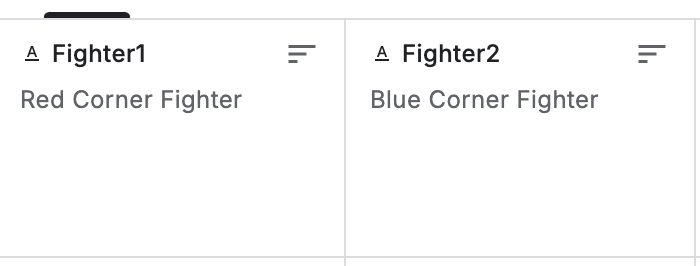



In [ ]:
# checking the range of fighters_odds_dropped data
print(fighters_odds_dropped['Date'].max())
print(fighters_odds_dropped['Date'].min())

2024-12-07 00:00:00
2010-03-21 00:00:00


In [ ]:
# making sure the date of the fight makes sense
fighters_odds_dropped[fighters_odds_dropped['Date']== '2024-12-07 00:00:00']

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,2024-12-07,Red,True,Flyweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,6,6,42,3,0,2,4,2,4,0,34,31,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,2024-12-07,Red,False,Welterweight,MALE,0,8,8,20,0,0,1,4,3,0,0,0,6,6,11,0,0,0,0,1,5,0,30,27,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,2024-12-07,Red,False,Heavyweight,MALE,0,4,4,44,0,0,1,4,6,1,0,0,1,7,33,3,0,0,3,4,2,0,34,36,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,2024-12-07,Red,False,Featherweight,MALE,2,0,1,7,0,0,0,0,0,1,0,1,0,6,22,0,1,0,5,0,1,0,30,36,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,2024-12-07,Blue,False,Featherweight,MALE,0,1,3,15,0,0,0,0,4,0,0,0,1,3,17,0,1,0,1,1,2,0,36,33,275.0,550.0,500.0,700.0,300.0,250.0
5,Dominick Reyes,Anthony Smith,-380.0,300.0,2024-12-07,Red,False,Light Heavyweight,MALE,1,0,3,63,1,0,1,1,7,6,0,0,1,6,21,2,0,1,1,4,1,0,34,36,250.0,750.0,1200.0,1200.0,-125.0,800.0
6,Vicente Luque,Themba Gorimbo,-650.0,-162.0,2024-12-07,Red,False,Welterweight,MALE,0,4,4,12,0,0,0,3,1,0,0,1,0,6,47,0,0,1,1,8,5,0,33,33,450.0,130.0,450.0,900.0,600.0,450.0
7,Movsar Evloev,Aljamain Sterling,-238.0,195.0,2024-12-07,Red,False,Featherweight,MALE,0,1,9,57,5,0,2,7,2,4,0,0,8,8,24,0,0,1,7,0,0,0,30,35,-135.0,275.0,1600.0,1100.0,550.0,1600.0
8,Randy Brown,Bryan Battle,150.0,-180.0,2024-12-07,Blue,False,Welterweight,MALE,0,3,3,16,0,0,0,1,3,2,0,0,3,4,43,0,0,1,6,3,3,0,34,30,400.0,185.0,1000.0,550.0,450.0,300.0
9,Chris Weidman,Eryk Anders,-112.0,-108.0,2024-12-07,Blue,False,Catch Weight,MALE,0,1,2,44,0,0,1,3,4,0,0,0,1,9,46,5,0,0,5,4,3,0,40,37,150.0,200.0,1000.0,1800.0,650.0,380.0


In [ ]:
# making sure the date of the fight makes sense
fighters_odds_dropped[fighters_odds_dropped['Date']== '2010-03-21 00:00:00']

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
6517,Brandon Vera,Jon Jones,215.0,-235.0,2010-03-21,Blue,False,Light Heavyweight,MALE,1,0,3,9,0,0,0,2,0,1,0,1,0,4,23,0,0,0,2,4,1,0,32,22,NaN,NaN,NaN,NaN,NaN,NaN
6518,Junior Dos Santos,Gabriel Gonzaga,-250.0,230.0,2010-03-21,Red,False,Heavyweight,MALE,0,1,4,16,1,0,0,0,5,2,0,0,4,4,6,0,0,0,0,4,0,0,26,30,NaN,NaN,NaN,NaN,NaN,NaN
6519,Cheick Kongo,Paul Buentello,-345.0,315.0,2010-03-21,Red,False,Heavyweight,MALE,1,0,2,8,1,0,0,0,2,1,0,2,0,3,22,0,1,0,1,4,0,1,34,36,NaN,NaN,NaN,NaN,NaN,NaN
6520,Alessio Sakara,James Irvin,-120.0,100.0,2010-03-21,Red,False,Middleweight,MALE,1,0,2,10,0,0,0,0,3,0,0,0,2,2,15,0,0,1,1,3,0,0,28,31,NaN,NaN,NaN,NaN,NaN,NaN
6521,Clay Guida,Shannon Gugerty,-420.0,335.0,2010-03-21,Red,False,Lightweight,MALE,1,0,1,7,0,0,0,0,0,2,0,2,0,3,26,0,0,2,1,1,1,0,28,28,NaN,NaN,NaN,NaN,NaN,NaN
6522,Eliot Marshall,Vladimir Matyushenko,145.0,-165.0,2010-03-21,Blue,False,Light Heavyweight,MALE,0,1,2,16,1,0,0,3,1,0,0,0,3,3,7,0,0,1,1,0,1,0,29,39,NaN,NaN,NaN,NaN,NaN,NaN
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,Blue,False,Lightweight,MALE,0,0,0,0,0,0,0,0,0,0,0,1,0,2,5,0,0,0,1,1,0,0,31,25,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,Red,False,Welterweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,3,3,9,0,0,2,0,1,0,0,27,29,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,Red,False,Heavyweight,MALE,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,27,27,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,Red,False,Welterweight,MALE,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6,0,0,0,1,0,0,0,29,34,NaN,NaN,NaN,NaN,NaN,NaN


After googling those dates, I can confirm that 2024/12/07 was UFC 310: Pantoja vs. Asakura and the 2010/03/21 is UFC on Versus 1: Vera vs Jones

In [ ]:
# checking the range of fight_details_dropped data
print(fight_details_dropped['Date'].max())
print(fight_details_dropped['Date'].min())

2024-11-02 00:00:00
2016-07-09 00:00:00


In [ ]:
# making sure the date of the fight makes sense
fight_details_dropped[fight_details_dropped['Date']== '2024-11-02 00:00:00']

,Fighter1,Fighter2,Winner?,Fight_Method,Time,Time_Format,Referee,Finish_Details_or_Judges_Scorecard,Bout,Event_Name,Location,Date,Rounds,Total_Strike_Landed_F1,Total_Strike_Landed_F2,Total_Strike_Missed_F1,Total_Strike_Missed_F2,Non_Sig_Strike_Landed_F1,Non_Sig_Strike_Landed_F2,Non_Sig_Strike_Missed_F1,Non_Sig_Strike_Missed_F2,Sig_Strike_Landed_F1,Sig_Strike_Landed_F2,Sig_Strike_Missed_F1,Sig_Strike_Missed_F2,Head_F1,Head_F2,Body_F1,Body_F2,Leg_F1,Leg_F2,Distance_F1,Distance_F2,Ground_F1,Ground_F2,Knockdowns_F1,Knockdowns_F2,TD_Completed_F1,TD_Completed_F2,TD_Missed_F1,TD_Missed_F2,Sub_Att_F1,Sub_Att_F2,Rev_F1,Rev_F2,Ctrl_Time__Minutes__F1,Ctrl_Time__Minutes__F2
0,Brandon Moreno,Amir Albazi,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Eric Colon 46 - 49. Sal D'amato 45 - 50. Derek...,Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,5,132.0,75.0,185.0,171.0,0.0,0.0,0.0,1.0,132.0,75.0,185.0,170.0,113.0,64.0,12.0,5.0,7.0,6.0,128.0,74.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.150000
1,Erin Blanchfield,Rose Namajunas,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Blake Grice,Junichiro Kamijo 47 - 48. Mike Bell 47 - 48. D...,Women's Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,5,193.0,131.0,194.0,113.0,83.0,47.0,23.0,6.0,110.0,84.0,171.0,107.0,81.0,65.0,15.0,12.0,14.0,7.0,103.0,75.0,5.0,4.0,0.0,0.0,2.0,2.0,6.0,5.0,0.0,0.0,0.0,0.0,8.900000,4.266667
2,Caio Machado,Brendson Ribeiro,0,Decision - Split,5:00,3 Rnd (5-5-5),Jerin Valel,Sal D'amato 28 - 29. Thomas Collins 29 - 28. M...,Light Heavyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,79.0,49.0,108.0,82.0,3.0,0.0,0.0,0.0,76.0,49.0,108.0,82.0,24.0,25.0,33.0,16.0,19.0,8.0,76.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000
3,Ariane da Silva,Jasmine Jasudavicius,0,Submission,2:28,3 Rnd (5-5-5),Luke Boutin,D'Arce Choke On Ground,Women's Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,43.0,130.0,50.0,88.0,1.0,94.0,0.0,40.0,42.0,36.0,50.0,48.0,26.0,29.0,15.0,5.0,1.0,2.0,41.0,24.0,0.0,11.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000,5.733333
4,Marc-Andre Barriault,Dustin Stoltzfus,0,KO/TKO,4:28,3 Rnd (5-5-5),Marc Goddard,Punch to Head In Clinch,Middleweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,1,13.0,23.0,4.0,9.0,6.0,10.0,0.0,2.0,7.0,13.0,4.0,7.0,6.0,11.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016667,3.900000
5,Mike Malott,Trevin Giles,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),Andy Social,Eric Colon 27 - 30. Thomas Collins 28 - 29. Mi...,Welterweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,59.0,34.0,71.0,44.0,0.0,0.0,0.0,0.0,59.0,34.0,71.0,44.0,22.0,23.0,19.0,3.0,18.0,8.0,59.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6,Aiemann Zahabi,Pedro Munhoz,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),Jerin Valel,Sal D'amato 27 - 30. Eric Colon 28 - 29. Mike ...,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,110.0,95.0,98.0,232.0,1.0,0.0,1.0,0.0,109.0,95.0,97.0,232.0,98.0,82.0,11.0,7.0,0.0,6.0,109.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.000000,0.033333
7,Charles Jourdain,Victor Henry,1,Submission,3:43,3 Rnd (5-5-5),Blake Grice,Guillotine Choke Standing,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,2,50.0,39.0,37.0,36.0,11.0,15.0,3.0,6.0,39.0,24.0,34.0,30.0,19.0,8.0,14.0,11.0,6.0,5.0,31.0,22.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.283333,3.816667
8,Jack Shore,Youssef Zalal,0,Submission,0:59,3 Rnd (5-5-5),Luke Boutin,Arm Triangle From Half Guard,Featherweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,2,10.0,21.0,11.0,16.0,2.0,8.0,1.0,2.0,8.0,13.0,10.0,14.0,8.0,9.0,0.0,1.0,0.0,3.0,

In [ ]:
# making sure the date of the fight makes sense
fight_details_dropped[fight_details_dropped['Date']== '2016-07-09 00:00:00']

,Fighter1,Fighter2,Winner?,Fight_Method,Time,Time_Format,Referee,Finish_Details_or_Judges_Scorecard,Bout,Event_Name,Location,Date,Rounds,Total_Strike_Landed_F1,Total_Strike_Landed_F2,Total_Strike_Missed_F1,Total_Strike_Missed_F2,Non_Sig_Strike_Landed_F1,Non_Sig_Strike_Landed_F2,Non_Sig_Strike_Missed_F1,Non_Sig_Strike_Missed_F2,Sig_Strike_Landed_F1,Sig_Strike_Landed_F2,Sig_Strike_Missed_F1,Sig_Strike_Missed_F2,Head_F1,Head_F2,Body_F1,Body_F2,Leg_F1,Leg_F2,Distance_F1,Distance_F2,Ground_F1,Ground_F2,Knockdowns_F1,Knockdowns_F2,TD_Completed_F1,TD_Completed_F2,TD_Missed_F1,TD_Missed_F2,Sub_Att_F1,Sub_Att_F2,Rev_F1,Rev_F2,Ctrl_Time__Minutes__F1,Ctrl_Time__Minutes__F2
4155,Miesha Tate,Amanda Nunes,0,Submission,3:16,5 Rnd (5-5-5-5-5),Herb Dean,Rear Naked Choke,UFC Women's Bantamweight Title Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,1,3.0,40.0,12.0,23.0,0.0,0.0,0.0,0.0,3.0,40.0,12.0,23.0,2.0,35.0,1.0,3.0,0.0,2.0,3.0,30.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.450000
4156,Brock Lesnar,Mark Hunt,1,Overturned,5:00,3 Rnd (5-5-5),Dan Miragliotta,Failed Drug Test by Lesnar Lester Griffin 27 -...,Heavyweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,137.0,46.0,30.0,22.0,86.0,33.0,6.0,3.0,51.0,13.0,24.0,19.0,47.0,12.0,2.0,1.0,2.0,0.0,7.0,11.0,43.0,2.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,8.116667,0.000000
4157,Daniel Cormier,Anderson Silva,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),John McCarthy,Sal D'amato 26 - 30. Derek Cleary 26 - 30. G...,Light Heavyweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,153.0,30.0,55.0,26.0,120.0,13.0,24.0,0.0,33.0,17.0,31.0,26.0,27.0,9.0,2.0,4.0,4.0,4.0,15.0,16.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.550000,0.000000
4158,Jose Aldo,Frankie Edgar,1,Decision - Unanimous,5:00,5 Rnd (5-5-5),Marc Goddard,Derek Cleary 46 - 49. Marcos Rosales 46 - 49. ...,UFC Interim Featherweight Title Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,5,81.0,80.0,112.0,174.0,1.0,2.0,0.0,1.0,80.0,78.0,112.0,173.0,68.0,47.0,8.0,8.0,4.0,23.0,79.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.183333,0.000000
4159,Cain Velasquez,Travis Browne,1,KO/TKO,4:57,3 Rnd (5-5-5),John McCarthy,Punches to Head On Ground,Heavyweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,1,90.0,6.0,34.0,21.0,40.0,0.0,5.0,0.0,50.0,6.0,29.0,21.0,35.0,5.0,5.0,1.0,10.0,0.0,28.0,6.0,17.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.600000,0.000000
4160,Cat Zingano,Julianna Pena,0,Decision - Unanimous,5:00,3 Rnd (5-5-5),Herb Dean,Glenn Trowbridge 28 - 29. Chris Lee 28 - 29. ...,Women's Bantamweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,23.0,129.0,14.0,21.0,12.0,117.0,2.0,12.0,11.0,12.0,12.0,9.0,6.0,8.0,4.0,4.0,1.0,0.0,3.0,1.0,6.0,9.0,0.0,0.0,3.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,9.083333,4.866667
4161,Johny Hendricks,Kelvin Gastelum,0,Decision - Unanimous,5:00,3 Rnd (5-5-5),Dan Miragliotta,Sal D'amato 28 - 29. Adalaide Byrd 27 - 30. De...,Welterweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,90.0,134.0,87.0,125.0,20.0,10.0,0.0,0.0,70.0,124.0,87.0,125.0,51.0,89.0,5.0,19.0,14.0,16.0,58.0,114.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,2.150000,0.350000
4162,TJ Dillashaw,Raphael Assuncao,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),Mark Smith,Junichiro Kamijo 27 - 30. Chris Lee 27 - 30. J...,Bantamweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,72.0,52.0,133.0,91.0,8.0,3.0,2.0,0.0,64.0,49.0,131.0,91.0,33.0,25.0,10.0,11.0,21.0,13.0,61.0,46.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.816667,0.033333
4163,Sage Northcutt,Enrique Marin,1,Decision - Unanimous,5:00,3 Rnd (5-5-5),Marc Goddard,Derek Cleary 28 - 29. Adalaide Byrd 28 - 29. G...,Lightweight Bout,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09,3,106.0,26.0,29.0,22.0,65.0,10.0,4.0,2.0,41.0,16.0,25.0,20.0,36.0,12.0,3.0,2.0,2.0,2.0,14.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,2.0,6.0,1.0,2

Also confirmed that 2024-11-02 is UFC Fight Night: Moreno vs. Albazi and 2016-07-09 is UFC 200

now we will sort the data by dates to ensure the merge doesn't have confusion in which fight to merge in case there is rematch which there most likely will be.

In [ ]:
fighters_odds_dropped = fighters_odds_dropped.sort_values(by='Date', ascending=False)
fight_details_dropped = fight_details_dropped.sort_values(by='Date', ascending=False)

In [ ]:
fighters_odds_dropped.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,2024-12-07,Red,True,Flyweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,6,6,42,3,0,2,4,2,4,0,34,31,300.0,800.0,150.0,2500.0,400.0,350.0
8,Randy Brown,Bryan Battle,150.0,-180.0,2024-12-07,Blue,False,Welterweight,MALE,0,3,3,16,0,0,0,1,3,2,0,0,3,4,43,0,0,1,6,3,3,0,34,30,400.0,185.0,1000.0,550.0,450.0,300.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,2024-12-07,Red,False,Welterweight,MALE,0,8,8,20,0,0,1,4,3,0,0,0,6,6,11,0,0,0,0,1,5,0,30,27,250.0,650.0,180.0,3000.0,240.0,700.0
13,Kennedy Nzechukwu,Lukasz Brzeski,-550.0,410.0,2024-12-07,Red,False,Heavyweight,MALE,1,0,1,14,0,0,0,1,0,1,0,0,1,3,31,0,0,1,1,6,1,0,32,32,300.0,700.0,700.0,3000.0,-150.0,1200.0
12,Clay Guida,Chase Hooper,700.0,-1100.0,2024-12-07,Blue,False,Lightweight,MALE,0,3,3,23,0,0,0,2,2,3,0,2,0,4,105,2,0,4,9,2,5,0,42,25,1200.0,225.0,2800.0,-165.0,2200.0,700.0


now we will trim the fighters_odds table to fit in the right size to the fight details. The reason why I am trimming this data is because fighters' odds are pointless if you don't know the result or how the fight went.

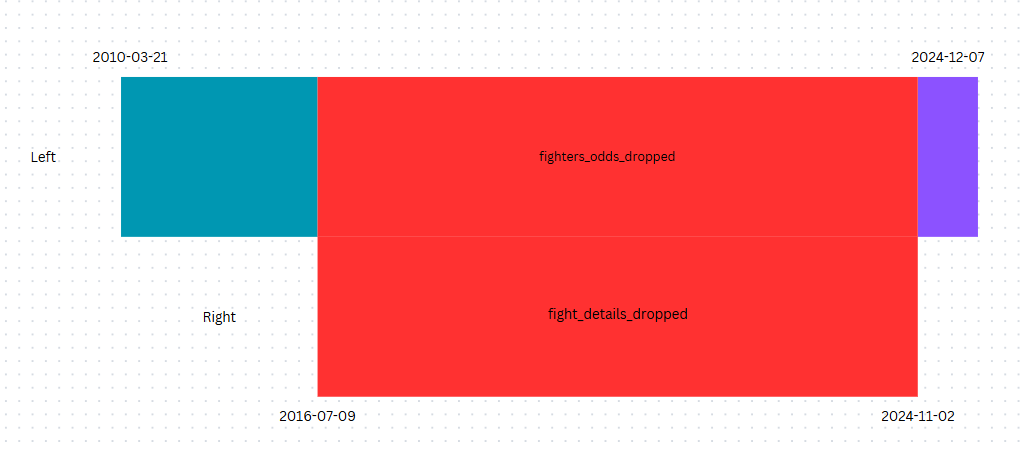

In [ ]:
# only keep the data that are in the span of dates in fight_details date period
fighters_odds_dropped[(fighters_odds_dropped['Date']>= '2016-07-09 00:00:00') & (fighters_odds_dropped['Date']<= '2024-11-02 00:00:00')]

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueLongestWinStreak,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,RedCurrentLoseStreak,RedCurrentWinStreak,RedLongestWinStreak,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedAge,BlueAge,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
57,Charles Jourdain,Victor Henry,NaN,NaN,2024-11-02,Red,False,Bantamweight,MALE,0,2,2,14,0,0,1,1,1,0,0,2,0,2,36,0,0,0,2,2,2,0,28,37,NaN,NaN,NaN,NaN,NaN,NaN
62,Jamey-Lyn Horth,Ivana Petrovic,NaN,NaN,2024-11-02,Red,False,Women's Flyweight,FEMALE,0,1,1,6,0,0,0,0,0,1,0,1,0,1,6,0,0,0,1,0,0,0,34,30,NaN,NaN,NaN,NaN,NaN,NaN
61,Chad Anheliger,Cody Gibson,NaN,NaN,2024-11-02,Blue,False,Bantamweight,MALE,0,1,1,16,0,0,0,0,1,1,0,0,1,2,15,0,0,1,1,1,0,0,37,37,NaN,NaN,NaN,NaN,NaN,NaN
60,Serhiy Sidey,Garrett Armfield,NaN,NaN,2024-11-02,Red,False,Bantamweight,MALE,1,0,2,9,0,0,0,1,1,0,0,1,0,1,4,0,0,0,0,1,0,0,28,28,NaN,NaN,NaN,NaN,NaN,NaN
59,Alexandr Romanov,Rodrigo Nascimento,NaN,NaN,2024-11-02,Red,False,Heavyweight,MALE,1,0,3,18,0,0,2,1,0,2,0,1,0,5,17,0,0,1,1,1,3,0,33,31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,Johny Hendricks,Kelvin Gastelum,-105.0,-115.0,2016-07-09,Blue,False,Welterweight,MALE,1,0,5,21,1,0,2,1,1,2,0,1,0,6,43,3,1,2,4,5,0,0,32,24,190.0,175.0,1000.0,900.0,425.0,550.0
4127,Jose Aldo,Frankie Edgar,120.0,-140.0,2016-07-09,Red,True,Featherweight,MALE,0,5,5,69,7,0,0,8,4,2,0,1,0,7,31,8,0,0,5,2,0,0,29,34,300.0,225.0,900.0,700.0,325.0,375.0
4125,Miesha Tate,Amanda Nunes,265.0,-325.0,2016-07-09,Blue,True,Women's Bantamweight,FEMALE,0,3,3,10,0,0,0,1,3,1,0,0,5,5,23,2,1,0,3,0,1,0,29,28,250.0,700.0,175.0,900.0,600.0,350.0
4129,Cat Zingano,Julianna Pena,-175.0,155.0,2016-07-09,Blue,False,Women's Bantamweight,FEMALE,0,3,3,5,1,0,0,1,2,0,0,1,0,2,7,1,0,0,0,2,0,0,34,26,200.0,250.0,500.0,725.0,350.0,625.0


In [ ]:
# taking char out of column name
fight_details_dropped = fight_details_dropped.rename(columns={'Winner?': 'Winner'})


In [ ]:
# checking to make sure
fight_details_dropped.head()

,Fighter1,Fighter2,Winner,Fight_Method,Time,Time_Format,Referee,Finish_Details_or_Judges_Scorecard,Bout,Event_Name,Location,Date,Rounds,Total_Strike_Landed_F1,Total_Strike_Landed_F2,Total_Strike_Missed_F1,Total_Strike_Missed_F2,Non_Sig_Strike_Landed_F1,Non_Sig_Strike_Landed_F2,Non_Sig_Strike_Missed_F1,Non_Sig_Strike_Missed_F2,Sig_Strike_Landed_F1,Sig_Strike_Landed_F2,Sig_Strike_Missed_F1,Sig_Strike_Missed_F2,Head_F1,Head_F2,Body_F1,Body_F2,Leg_F1,Leg_F2,Distance_F1,Distance_F2,Ground_F1,Ground_F2,Knockdowns_F1,Knockdowns_F2,TD_Completed_F1,TD_Completed_F2,TD_Missed_F1,TD_Missed_F2,Sub_Att_F1,Sub_Att_F2,Rev_F1,Rev_F2,Ctrl_Time__Minutes__F1,Ctrl_Time__Minutes__F2
0,Brandon Moreno,Amir Albazi,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Eric Colon 46 - 49. Sal D'amato 45 - 50. Derek...,Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,5,132.0,75.0,185.0,171.0,0.0,0.0,0.0,1.0,132.0,75.0,185.0,170.0,113.0,64.0,12.0,5.0,7.0,6.0,128.0,74.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.150000
7,Charles Jourdain,Victor Henry,1,Submission,3:43,3 Rnd (5-5-5),Blake Grice,Guillotine Choke Standing,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,2,50.0,39.0,37.0,36.0,11.0,15.0,3.0,6.0,39.0,24.0,34.0,30.0,19.0,8.0,14.0,11.0,6.0,5.0,31.0,22.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.283333,3.816667
12,Jamey-Lyn Horth,Ivana Petrovic,1,Decision - Split,5:00,3 Rnd (5-5-5),Blake Grice,Eric Colon 27 - 30. Thomas Collins 29 - 28. Mi...,Women's Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,50.0,67.0,44.0,61.0,21.0,42.0,3.0,11.0,29.0,25.0,41.0,50.0,17.0,17.0,11.0,6.0,1.0,2.0,21.0,25.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,2.0,2.500000,7.750000
11,Chad Anheliger,Cody Gibson,0,Decision - Unanimous,5:00,3 Rnd (5-5-5),Jerin Valel,Derek Cleary 26 - 30. Junichiro Kamijo 27 - 30...,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,59.0,59.0,18.0,34.0,48.0,43.0,10.0,16.0,11.0,16.0,8.0,18.0,8.0,15.0,0.0,0.0,3.0,1.0,11.0,6.0,0.0,10.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,2.0,0.0,0.0,0.000000,12.416667
10,Serhiy Sidey,Garrett Armfield,1,Decision - Split,5:00,3 Rnd (5-5-5),Andy Social,Derek Cleary 28 - 29. Mike Bell 29 - 28. Junic...,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,75.0,77.0,76.0,71.0,7.0,6.0,0.0,0.0,68.0,71.0,76.0,71.0,40.0,57.0,22.0,9.0,6.0,5.0,60.0,65.0,1.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,3.0,1.0,1.0,0.0,0.783333,4.883333


We have gotten rid of lots of fight but better than carrying unnecessary data

# Load

## Define your helper functions

In [ ]:
# Helper functions
import psycopg2

# Make our connection/cursor function
AWS_host_name = "ista322finalprojectrdb.cnwq6cogq5x9.us-east-2.rds.amazonaws.com"
AWS_dbname = "ista322finalprojectrdb"
AWS_user_name = "postgres"
AWS_password = "Cyberlmc2018!"

def get_conn_cur(): # define function name and arguments (there aren't any)
  # Make a connection
  conn = psycopg2.connect(
    host=AWS_host_name,
    database=AWS_dbname,
    user=AWS_user_name,
    password=AWS_password,
    port='5432')

  cur = conn.cursor()   # Make a cursor after

  return(conn, cur)   # Return both the connection and the cursor

def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results


def get_column_names(table_name): # arguement of table_name
  conn, cur = get_conn_cur() # get connection and cursor

  # Now select column names while inserting the table name into the WERE
  column_name_query =  """SELECT column_name FROM information_schema.columns
       WHERE table_name = '%s' """ %table_name

  cur.execute(column_name_query) # exectue
  my_data = cur.fetchall() # store

  cur.close() # close
  conn.close() # close

  return(my_data) # return

def run_query(query_string):

  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute(query_string) # executing string as before

  my_data = cur.fetchall() # fetch query data as before

  # here we're extracting the 0th element for each item in cur.description
  colnames = [desc[0] for desc in cur.description]

  cur.close() # close
  conn.close() # close

  return(colnames, my_data) # return column names AND data

# make sql_head function

def sql_head(table_name):
  conn, cur = get_conn_cur() # get connection and cursor

  table_head_query = """SELECT * FROM %s
                          LIMIT 5""" %table_name

  cur.execute(table_head_query) # exectue
  my_data = cur.fetchall() # store
  colnames = [desc[0] for desc in cur.description]

  cur.close() # close
  conn.close() # close

  df = pd.DataFrame(data = my_data, columns = colnames) # make into df

  return(df) # return

### This is an extra function I'm giving you that allows you to drop tables from your RDB. This will be vital as you can only create your table once.
# If you try creating the same table when it already exists on your RDB, you'll get an error.
# I recommend calling this function one line above your code creating your table. eg for cases, you'd call it like this: my_drop_table('cases')
def my_drop_table(tab_name):
  conn, cur = get_conn_cur()
  tq = """DROP TABLE IF EXISTS %s CASCADE;""" %tab_name
  cur.execute(tq)
  conn.commit()

## Load my data

Time to load our cleaned data to AWS in SQL, here is a visual view of the database

---



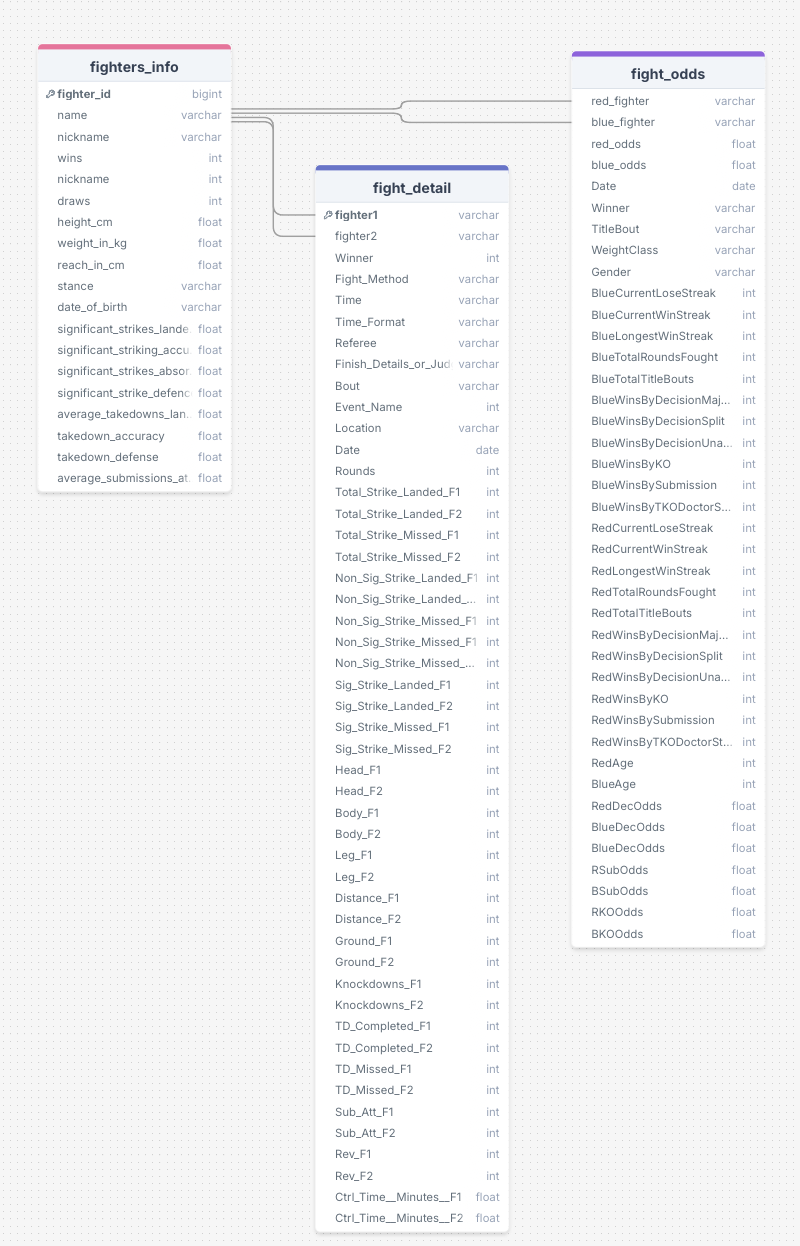

### Load fighters_info

In [ ]:
# adjust the NaN values
fighters_info = fighters_info.fillna(np.nan).replace([np.nan], [None])

In [ ]:
# check the columns to see what we are woring with
fighters_info.columns

Index(['fighter_id', 'name', 'nickname', 'wins', 'losses', 'draws',
       'height_cm', 'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [ ]:
# gettin the idea of the tuple size
fighters_info.shape

(4140, 19)

In [ ]:
# drop the table if we need to start from scratch
my_drop_table('fighters_info')

In [ ]:
# load the data to aws
conn, cur = get_conn_cur()
tq = """CREATE TABLE fighters_info (
    fighter_id BIGINT PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    nickname VARCHAR(255),
    wins INTEGER,
    losses INTEGER,
    draws INTEGER,
    height_cm FLOAT,
    weight_in_kg FLOAT,
    reach_in_cm FLOAT,
    stance VARCHAR(255),
    date_of_birth VARCHAR(255),
    significant_strikes_landed_per_minute FLOAT,
    significant_striking_accuracy FLOAT,
    significant_strikes_absorbed_per_minute FLOAT,
    significant_strike_defence FLOAT,
    average_takedowns_landed_per_15_minutes FLOAT,
    takedown_accuracy FLOAT,
    takedown_defense FLOAT,
    average_submissions_attempted_per_15_minutes FLOAT
    );"""
cur.execute(tq)
conn.commit()

In [ ]:
# making tuples to insert
fighters_info_tups = [tuple(x) for x in fighters_info.to_numpy()]
iq = """INSERT INTO fighters_info(""" + ','.join(fighters_info.columns) + """) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
# execute
conn, cur = get_conn_cur()
cur.executemany(iq, fighters_info_tups)
conn.commit()

In [ ]:
sql_head('fighters_info')

,fighter_id,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,0,Robert Drysdale,None,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,None,None,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,2,Dan Molina,None,13,9,0,177.80,97.98,NaN,None,None,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,3,Paul Ruiz,None,7,4,0,167.64,61.23,NaN,None,None,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


### Load fighters_odds

Do the same for fighter_odds table

In [ ]:
fighters_odds_dropped.shape

(6528, 39)

In [ ]:
fighters_odds_dropped.columns

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'Date', 'Winner',
       'TitleBout', 'WeightClass', 'Gender', 'BlueCurrentLoseStreak',
       'BlueCurrentWinStreak', 'BlueLongestWinStreak', 'BlueTotalRoundsFought',
       'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority',
       'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedLongestWinStreak',
       'RedTotalRoundsFought', 'RedTotalTitleBouts',
       'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit',
       'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission',
       'RedWinsByTKODoctorStoppage', 'RedAge', 'BlueAge', 'RedDecOdds',
       'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds'],
      dtype='object')

In [ ]:
fighters_odds_dropped = fighters_odds_dropped.fillna(np.nan).replace([np.nan], [None])

In [ ]:
my_drop_table('fighters_odds')

In [ ]:
conn, cur = get_conn_cur()
tq = """CREATE TABLE fighters_odds (
    RedFighter VARCHAR(255) NOT NULL,
    BlueFighter VARCHAR(255) NOT NULL,
    RedOdds FLOAT,
    BlueOdds FLOAT,
    Date DATE NOT NULL,
    Winner VARCHAR(255),
    TitleBout VARCHAR(255),
    WeightClass VARCHAR(255),
    Gender VARCHAR(255),
    BlueCurrentLoseStreak INTEGER,
    BlueCurrentWinStreak INTEGER,
    BlueLongestWinStreak INTEGER,
    BlueTotalRoundsFought INTEGER,
    BlueTotalTitleBouts INTEGER,
    BlueWinsByDecisionMajority INTEGER,
    BlueWinsByDecisionSplit INTEGER,
    BlueWinsByDecisionUnanimous INTEGER,
    BlueWinsByKO INTEGER,
    BlueWinsBySubmission INTEGER,
    BlueWinsByTKODoctorStoppage INTEGER,
    RedCurrentLoseStreak INTEGER,
    RedCurrentWinStreak INTEGER,
    RedLongestWinStreak INTEGER,
    RedTotalRoundsFought INTEGER,
    RedTotalTitleBouts INTEGER,
    RedWinsByDecisionMajority INTEGER,
    RedWinsByDecisionSplit INTEGER,
    RedWinsByDecisionUnanimous INTEGER,
    RedWinsByKO INTEGER,
    RedWinsBySubmission INTEGER,
    RedWinsByTKODoctorStoppage INTEGER,
    RedAge INTEGER,
    BlueAge INTEGER,
    RedDecOdds FLOAT,
    BlueDecOdds FLOAT,
    RSubOdds FLOAT,
    BSubOdds FLOAT,
    RKOOdds FLOAT,
    BKOOdds FLOAT
    );"""
cur.execute(tq)
conn.commit()

In [ ]:
fighters_odds_tups = [tuple(x) for x in fighters_odds_dropped.to_numpy()]
iq = """INSERT INTO fighters_odds(""" + ','.join(fighters_odds_dropped.columns) + """) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                              %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                              %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                              %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, fighters_odds_tups)
conn.commit()

In [ ]:
sql_head('fighters_odds')

,redfighter,bluefighter,redodds,blueodds,date,winner,titlebout,weightclass,gender,bluecurrentlosestreak,bluecurrentwinstreak,bluelongestwinstreak,bluetotalroundsfought,bluetotaltitlebouts,bluewinsbydecisionmajority,bluewinsbydecisionsplit,bluewinsbydecisionunanimous,bluewinsbyko,bluewinsbysubmission,bluewinsbytkodoctorstoppage,redcurrentlosestreak,redcurrentwinstreak,redlongestwinstreak,redtotalroundsfought,redtotaltitlebouts,redwinsbydecisionmajority,redwinsbydecisionsplit,redwinsbydecisionunanimous,redwinsbyko,redwinsbysubmission,redwinsbytkodoctorstoppage,redage,blueage,reddecodds,bluedecodds,rsubodds,bsubodds,rkoodds,bkoodds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,2024-12-07,Red,true,Flyweight,MALE,0,0,0,0,0,0,0,0,0,0,0,0,6,6,42,3,0,2,4,2,4,0,34,31,300.0,800.0,150.0,2500.0,400.0,350.0
1,Randy Brown,Bryan Battle,150.0,-180.0,2024-12-07,Blue,false,Welterweight,MALE,0,3,3,16,0,0,0,1,3,2,0,0,3,4,43,0,0,1,6,3,3,0,34,30,400.0,185.0,1000.0,550.0,450.0,300.0
2,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,2024-12-07,Red,false,Welterweight,MALE,0,8,8,20,0,0,1,4,3,0,0,0,6,6,11,0,0,0,0,1,5,0,30,27,250.0,650.0,180.0,3000.0,240.0,700.0
3,Kennedy Nzechukwu,Lukasz Brzeski,-550.0,410.0,2024-12-07,Red,false,Heavyweight,MALE,1,0,1,14,0,0,0,1,0,1,0,0,1,3,31,0,0,1,1,6,1,0,32,32,300.0,700.0,700.0,3000.0,-150.0,1200.0
4,Clay Guida,Chase Hooper,700.0,-1100.0,2024-12-07,Blue,false,Lightweight,MALE,0,3,3,23,0,0,0,2,2,3,0,2,0,4,105,2,0,4,9,2,5,0,42,25,1200.0,225.0,2800.0,-165.0,2200.0,700.0


### Load fight_details

Same thing for fight_details table

In [ ]:
# check the columns to see what we are woring with
fight_details_dropped.columns

Index(['Fighter1', 'Fighter2', 'Winner', 'Fight_Method', 'Time', 'Time_Format',
       'Referee', 'Finish_Details_or_Judges_Scorecard', 'Bout', 'Event_Name',
       'Location', 'Date', 'Rounds', 'Total_Strike_Landed_F1',
       'Total_Strike_Landed_F2', 'Total_Strike_Missed_F1',
       'Total_Strike_Missed_F2', 'Non_Sig_Strike_Landed_F1',
       'Non_Sig_Strike_Landed_F2', 'Non_Sig_Strike_Missed_F1',
       'Non_Sig_Strike_Missed_F2', 'Sig_Strike_Landed_F1',
       'Sig_Strike_Landed_F2', 'Sig_Strike_Missed_F1', 'Sig_Strike_Missed_F2',
       'Head_F1', 'Head_F2', 'Body_F1', 'Body_F2', 'Leg_F1', 'Leg_F2',
       'Distance_F1', 'Distance_F2', 'Ground_F1', 'Ground_F2', 'Knockdowns_F1',
       'Knockdowns_F2', 'TD_Completed_F1', 'TD_Completed_F2', 'TD_Missed_F1',
       'TD_Missed_F2', 'Sub_Att_F1', 'Sub_Att_F2', 'Rev_F1', 'Rev_F2',
       'Ctrl_Time__Minutes__F1', 'Ctrl_Time__Minutes__F2'],
      dtype='object')

We will make sure to change the float values that are supposed to be int

In [ ]:
fight_details_dropped.Total_Strike_Landed_F1 = fight_details_dropped.Total_Strike_Landed_F1.astype('Int64')
fight_details_dropped.Total_Strike_Landed_F2 = fight_details_dropped.Total_Strike_Landed_F1.astype('Int64')

fight_details_dropped.Total_Strike_Missed_F1 = fight_details_dropped.Total_Strike_Missed_F1.astype('Int64')
fight_details_dropped.Total_Strike_Missed_F2 = fight_details_dropped.Total_Strike_Missed_F1.astype('Int64')

fight_details_dropped.Non_Sig_Strike_Landed_F1 = fight_details_dropped.Non_Sig_Strike_Landed_F1.astype('Int64')
fight_details_dropped.Non_Sig_Strike_Landed_F2 = fight_details_dropped.Non_Sig_Strike_Landed_F1.astype('Int64')

fight_details_dropped.Non_Sig_Strike_Missed_F1 = fight_details_dropped.Non_Sig_Strike_Missed_F1.astype('Int64')
fight_details_dropped.Non_Sig_Strike_Missed_F2 = fight_details_dropped.Non_Sig_Strike_Missed_F1.astype('Int64')

fight_details_dropped.Sig_Strike_Landed_F1 = fight_details_dropped.Sig_Strike_Landed_F1.astype('Int64')
fight_details_dropped.Sig_Strike_Landed_F2 = fight_details_dropped.Sig_Strike_Landed_F1.astype('Int64')

fight_details_dropped.Sig_Strike_Missed_F1 = fight_details_dropped.Sig_Strike_Missed_F1.astype('Int64')
fight_details_dropped.Sig_Strike_Missed_F2 = fight_details_dropped.Sig_Strike_Missed_F2.astype('Int64')

fight_details_dropped.Head_F1 = fight_details_dropped.Head_F1.astype('Int64')
fight_details_dropped.Head_F2 = fight_details_dropped.Head_F2.astype('Int64')

fight_details_dropped.Body_F1 = fight_details_dropped.Body_F1.astype('Int64')
fight_details_dropped.Body_F2 = fight_details_dropped.Body_F2.astype('Int64')

fight_details_dropped.Leg_F1 = fight_details_dropped.Leg_F1.astype('Int64')
fight_details_dropped.Leg_F2 = fight_details_dropped.Leg_F2.astype('Int64')

fight_details_dropped.Distance_F1 = fight_details_dropped.Distance_F1.astype('Int64')
fight_details_dropped.Distance_F2 = fight_details_dropped.Distance_F2.astype('Int64')

fight_details_dropped.Ground_F1 = fight_details_dropped.Ground_F1.astype('Int64')
fight_details_dropped.Ground_F2 = fight_details_dropped.Ground_F2.astype('Int64')


fight_details_dropped.Knockdowns_F1 = fight_details_dropped.Knockdowns_F1.astype('Int64')
fight_details_dropped.Knockdowns_F2 = fight_details_dropped.Knockdowns_F2.astype('Int64')

fight_details_dropped.TD_Completed_F1 = fight_details_dropped.TD_Completed_F1.astype('Int64')
fight_details_dropped.TD_Completed_F2 = fight_details_dropped.TD_Completed_F2.astype('Int64')

fight_details_dropped.TD_Missed_F1 = fight_details_dropped.TD_Missed_F1.astype('Int64')
fight_details_dropped.TD_Missed_F2 = fight_details_dropped.TD_Missed_F2.astype('Int64')

fight_details_dropped.Sub_Att_F1 = fight_details_dropped.Sub_Att_F1.astype('Int64')
fight_details_dropped.Sub_Att_F2 = fight_details_dropped.Sub_Att_F2.astype('Int64')

fight_details_dropped.Rev_F1 = fight_details_dropped.Rev_F1.astype('Int64')
fight_details_dropped.Rev_F2 = fight_details_dropped.Rev_F2.astype('Int64')

And also to make sure our NaN values are friendly to postgre

In [ ]:
fight_details_dropped = fight_details_dropped.fillna(np.nan).replace([np.nan], [None])

In [ ]:
fight_details_dropped.columns

Index(['Fighter1', 'Fighter2', 'Winner', 'Fight_Method', 'Time', 'Time_Format',
       'Referee', 'Finish_Details_or_Judges_Scorecard', 'Bout', 'Event_Name',
       'Location', 'Date', 'Rounds', 'Total_Strike_Landed_F1',
       'Total_Strike_Landed_F2', 'Total_Strike_Missed_F1',
       'Total_Strike_Missed_F2', 'Non_Sig_Strike_Landed_F1',
       'Non_Sig_Strike_Landed_F2', 'Non_Sig_Strike_Missed_F1',
       'Non_Sig_Strike_Missed_F2', 'Sig_Strike_Landed_F1',
       'Sig_Strike_Landed_F2', 'Sig_Strike_Missed_F1', 'Sig_Strike_Missed_F2',
       'Head_F1', 'Head_F2', 'Body_F1', 'Body_F2', 'Leg_F1', 'Leg_F2',
       'Distance_F1', 'Distance_F2', 'Ground_F1', 'Ground_F2', 'Knockdowns_F1',
       'Knockdowns_F2', 'TD_Completed_F1', 'TD_Completed_F2', 'TD_Missed_F1',
       'TD_Missed_F2', 'Sub_Att_F1', 'Sub_Att_F2', 'Rev_F1', 'Rev_F2',
       'Ctrl_Time__Minutes__F1', 'Ctrl_Time__Minutes__F2'],
      dtype='object')

In [ ]:
# gettin the idea of the tuple size
fight_details_dropped.shape

(4167, 47)

In [ ]:
# drop the table if we need to start from scratch
my_drop_table('fight_details')

In [ ]:
# load the data to aws
conn, cur = get_conn_cur()
tq = """CREATE TABLE fight_details (
    Fighter1 VARCHAR(255) NOT NULL,
    Fighter2 VARCHAR(255) NOT NULL,
    Winner INTEGER,
    Fight_Method VARCHAR(255),
    Time VARCHAR(255),
    Time_Format VARCHAR(255),
    Referee VARCHAR(255),
    Finish_Details_or_Judges_Scorecard VARCHAR(255),
    Bout VARCHAR(255),
    Event_Name VARCHAR(255),
    Location VARCHAR(255),
    Date DATE,
    Rounds INTEGER,
    Total_Strike_Landed_F1 INTEGER,
    Total_Strike_Landed_F2 INTEGER,
    Total_Strike_Missed_F1 INTEGER,
    Total_Strike_Missed_F2 INTEGER,
    Non_Sig_Strike_Landed_F1 INTEGER,
    Non_Sig_Strike_Landed_F2 INTEGER,
    Non_Sig_Strike_Missed_F1 INTEGER,
    Non_Sig_Strike_Missed_F2 INTEGER,
    Sig_Strike_Landed_F1 INTEGER,
    Sig_Strike_Landed_F2 INTEGER,
    Sig_Strike_Missed_F1 INTEGER,
    Sig_Strike_Missed_F2 INTEGER,
    Head_F1 INTEGER,
    Head_F2 INTEGER,
    Body_F1 INTEGER,
    Body_F2 INTEGER,
    Leg_F1 INTEGER,
    Leg_F2 INTEGER,
    Distance_F1 INTEGER,
    Distance_F2 INTEGER,
    Ground_F1 INTEGER,
    Ground_F2 INTEGER,
    Knockdowns_F1 INTEGER,
    Knockdowns_F2 INTEGER,
    TD_Completed_F1 INTEGER,
    TD_Completed_F2 INTEGER,
    TD_Missed_F1 INTEGER,
    TD_Missed_F2 INTEGER,
    Sub_Att_F1 INTEGER,
    Sub_Att_F2 INTEGER,
    Rev_F1 INTEGER,
    Rev_F2 INTEGER,
    Ctrl_Time__Minutes__F1 FLOAT,
    Ctrl_Time__Minutes__F2 FLOAT
    );"""
cur.execute(tq)
conn.commit()

In [ ]:
fight_details_tups = [tuple(x) for x in fight_details_dropped.to_numpy()]
iq = """INSERT INTO fight_details(""" + ','.join(fight_details_dropped.columns) + """) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                       %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                       %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                       %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                                       %s, %s, %s, %s, %s, %s, %s
                                                                                       );"""

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(iq, fight_details_tups)
conn.commit()

In [ ]:
sql_head('fight_details')

,fighter1,fighter2,winner,fight_method,time,time_format,referee,finish_details_or_judges_scorecard,bout,event_name,location,date,rounds,total_strike_landed_f1,total_strike_landed_f2,total_strike_missed_f1,total_strike_missed_f2,non_sig_strike_landed_f1,non_sig_strike_landed_f2,non_sig_strike_missed_f1,non_sig_strike_missed_f2,sig_strike_landed_f1,sig_strike_landed_f2,sig_strike_missed_f1,sig_strike_missed_f2,head_f1,head_f2,body_f1,body_f2,leg_f1,leg_f2,distance_f1,distance_f2,ground_f1,ground_f2,knockdowns_f1,knockdowns_f2,td_completed_f1,td_completed_f2,td_missed_f1,td_missed_f2,sub_att_f1,sub_att_f2,rev_f1,rev_f2,ctrl_time__minutes__f1,ctrl_time__minutes__f2
0,Brandon Moreno,Amir Albazi,1,Decision - Unanimous,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Eric Colon 46 - 49. Sal D'amato 45 - 50. Derek...,Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,5,132,132,185,185,0,0,0,0,132,132,185,170,113,64,12,5,7,6,128,74,0,0,0,0,0,1,1,4,0,0,0,0,0.000000,0.150000
1,Charles Jourdain,Victor Henry,1,Submission,3:43,3 Rnd (5-5-5),Blake Grice,Guillotine Choke Standing,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,2,50,50,37,37,11,11,3,3,39,39,34,30,19,8,14,11,6,5,31,22,0,1,0,0,0,4,2,2,1,0,0,0,0.283333,3.816667
2,Jamey-Lyn Horth,Ivana Petrovic,1,Decision - Split,5:00,3 Rnd (5-5-5),Blake Grice,Eric Colon 27 - 30. Thomas Collins 29 - 28. Mi...,Women's Flyweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,50,50,44,44,21,21,3,3,29,29,41,50,17,17,11,6,1,2,21,25,0,0,0,0,2,2,2,4,0,0,0,2,2.500000,7.750000
3,Chad Anheliger,Cody Gibson,0,Decision - Unanimous,5:00,3 Rnd (5-5-5),Jerin Valel,Derek Cleary 26 - 30. Junichiro Kamijo 27 - 30...,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,59,59,18,18,48,48,10,10,11,11,8,18,8,15,0,0,3,1,11,6,0,10,0,0,0,5,0,1,0,2,0,0,0.000000,12.416667
4,Serhiy Sidey,Garrett Armfield,1,Decision - Split,5:00,3 Rnd (5-5-5),Andy Social,Derek Cleary 28 - 29. Mike Bell 29 - 28. Junic...,Bantamweight Bout,UFC Fight Night: Moreno vs. Albazi,"Edmonton, Alberta, Canada",2024-11-02,3,75,75,76,76,7,7,0,0,68,68,76,71,40,57,22,9,6,5,60,65,1,2,0,0,0,4,4,1,3,1,1,0,0.783333,4.883333


## Some Query examples

In [ ]:
# how many head hits has Alex pereira taken in his UFC career?
query = """
SELECT SUM(
            CASE
              WHEN Fighter1 = 'Alex Pereira' THEN Head_F1
              WHEN Fighter2 = 'Alex Pereira' THEN Head_F2
            END) AS Head_Hits
FROM fight_details
WHERE Fighter1 = 'Alex Pereira' OR Fighter2 = 'Alex Pereira';

"""
run_query(query)

(['head_hits'], [(287,)])

In [ ]:
# how many fighters are 182.9cm(6ft) or taller?
query = """
SELECT COUNT(*)
FROM fighters_info
WHERE height_cm >= 182.9;

"""
run_query(query)

(['count'], [(991,)])

In [ ]:
# how many fighters are 182.9cm(6ft) or taller?
query = """
SELECT COUNT(*)
FROM fighters_info
WHERE height_cm < 182.9;

"""
run_query(query)

(['count'], [(2851,)])

In [ ]:
# does shorter fighter whose less than 6ft(182.9cm) tall get more hits in the head then fighter whose 6ft or taller?
query= """
        SELECT
              CASE
                  WHEN fighter.height_cm < 182.9 THEN 'Short'
                  WHEN fighter.height_cm >= 182.9 THEN 'Tall'
              END AS Height,
              SUM(

                  CASE
                      WHEN fight_details.Fighter1 = fighter.name THEN fight_details.head_F1
                      WHEN fight_details.Fighter2 = fighter.name THEN fight_details.head_F2
              END) AS Head_Hits
        FROM fighters_info AS fighter
        JOIN fight_details ON fighter.name = fight_details.Fighter1 OR fighter.name = fight_details.Fighter2
        GROUP BY
              CASE
                  WHEN fighter.height_cm < 182.9 THEN 'Short'
                  WHEN fighter.height_cm >= 182.9 THEN 'Tall'
              END;


"""
run_query(query)

(['height', 'head_hits'], [('Short', 173589), ('Tall', 50900), (None, 330)])

by taking the ratio of head hits / # of players, the 'short' fighters gets hit around 57.6, and for the tall fighters is 49.35

So we could conclude that short fighters gets hit more in the head than tall fighters

In [ ]:
# but if they are taller than means their body is more accessible to hit than heads, especially their legs! let's see if we can prove it
query= """
        SELECT
              CASE
                  WHEN fighter.height_cm < 182.9 THEN 'Short'
                  WHEN fighter.height_cm >= 182.9 THEN 'Tall'
              END AS Height,
              SUM(

                  CASE
                      WHEN fight_details.Fighter1 = fighter.name THEN fight_details.leg_f1
                      WHEN fight_details.Fighter2 = fighter.name THEN fight_details.leg_f2
              END) AS leg_Hits
        FROM fighters_info AS fighter
        JOIN fight_details ON fighter.name = fight_details.Fighter1 OR fighter.name = fight_details.Fighter2
        GROUP BY
              CASE
                  WHEN fighter.height_cm < 182.9 THEN 'Short'
                  WHEN fighter.height_cm >= 182.9 THEN 'Tall'
              END;


"""
run_query(query)

(['height', 'leg_hits'], [('Short', 44622), ('Tall', 13678), (None, 93)])

by taking the ratio like above, the short fighters gets hit in the leg usually around 14.7 whereas the tall fighters gets hit in the leg 13.3

By this math, we could conclude that there is not much correlation in taller figthers getting in the leg more than shorter fighers.

In [ ]:
# how much leg kicks does Alex Pereira land when he fights orthodox vs southpaw

query= """
        SELECT
              CASE
                  WHEN opponents.stance = 'Southpaw' THEN 'southpaw'
                  WHEN opponents.stance = 'Orthodox' THEN 'orthodox'
              END AS Stance,
              AVG(

                  CASE
                      WHEN fight_details.Fighter1 = 'Alex Pereira' THEN fight_details.leg_f1
                      WHEN fight_details.Fighter2 = 'Alex Pereira' THEN fight_details.leg_f2
                  END )AS Leg_kicks
        FROM fight_details
        JOIN fighters_info AS opponents ON
         (fight_details.Fighter1 = 'Alex Pereira' AND fight_details.Fighter2 = opponents.name) OR
         (fight_details.Fighter2 = 'Alex Pereira' AND fight_details.Fighter1 = opponents.name)
        GROUP BY
              CASE
                  WHEN opponents.stance = 'Southpaw' THEN 'southpaw'
                  WHEN opponents.stance = 'Orthodox' THEN 'orthodox'
              END;

"""
run_query(query)

(['stance', 'leg_kicks'],
 [('orthodox', Decimal('9.4285714285714286')),
  ('southpaw', Decimal('12.0000000000000000')),
  (None, Decimal('24.0000000000000000'))])

In [ ]:


query= """
        SELECT
    opponents.stance AS Stance,
    opponents.name AS Opponent_Name
    FROM fight_details
    JOIN fighters_info AS opponents ON
    (fight_details.Fighter1 = 'Alex Pereira' AND fight_details.Fighter2 = opponents.name) OR
    (fight_details.Fighter2 = 'Alex Pereira' AND fight_details.Fighter1 = opponents.name)
    ORDER BY opponents.stance, opponents.name;

"""
run_query(query)


(['stance', 'opponent_name'],
 [('Orthodox', 'Andreas Michailidis'),
  ('Orthodox', 'Bruno Silva'),
  ('Orthodox', 'Bruno Silva'),
  ('Orthodox', 'Jan Blachowicz'),
  ('Orthodox', 'Jiri Prochazka'),
  ('Orthodox', 'Jiri Prochazka'),
  ('Orthodox', 'Sean Strickland'),
  ('Southpaw', 'Jamahal Hill'),
  ('Southpaw', 'Khalil Rountree Jr.'),
  ('Switch', 'Israel Adesanya'),
  ('Switch', 'Israel Adesanya')])

In [ ]:
query= """
        SELECT
              CASE
                  WHEN opponents.stance = 'Southpaw' THEN 'southpaw'
                  WHEN opponents.stance = 'Orthodox' THEN 'orthodox'
              END AS Stance,
              AVG(

                  CASE
                      WHEN fight_details.Fighter1 = 'Alex Pereira' THEN fight_details.Sig_Strike_Landed_F1
                      WHEN fight_details.Fighter2 = 'Alex Pereira' THEN fight_details.Sig_Strike_Landed_F2
                  END )AS sig_strikes
        FROM fight_details
        JOIN fighters_info AS opponents ON
         (fight_details.Fighter1 = 'Alex Pereira' AND fight_details.Fighter2 = opponents.name) OR
         (fight_details.Fighter2 = 'Alex Pereira' AND fight_details.Fighter1 = opponents.name)
        GROUP BY
              CASE
                  WHEN opponents.stance = 'Southpaw' THEN 'southpaw'
                  WHEN opponents.stance = 'Orthodox' THEN 'orthodox'
              END;

"""
run_query(query)

(['stance', 'sig_strikes'],
 [('orthodox', Decimal('51.7142857142857143')),
  ('southpaw', Decimal('75.5000000000000000')),
  (None, Decimal('67.5000000000000000'))])